In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


# Data 9

In [2]:
# Read in 
df9 = pd.read_csv('../data/df9.csv')

In [3]:
# Inspect
df9.head()

x1        x2        x3        x4        x5        x6  x7  x8   x9  \
0 -1.912877 -0.509738  1.935923 -2.119992  0.474137  3.647543  A2  B2  C33   
1 -0.341252  0.341502  2.268666 -0.948835 -0.492523  4.159113  A1  B4  C32   
2  0.658157 -0.347933  3.104409  0.236928  0.359240  6.498557  A1  B4   C4   
3  2.288540 -1.028834  3.554489 -0.215137 -0.436760  7.154874  A2  B1  C11   
4  0.618358 -1.526877  3.857197 -0.343902  0.098206  7.857794  A2  B2  C12   

  x10          y  
0  D3 -23.858957  
1  D2   4.795576  
2  D2  16.359090  
3  D3 -24.550723  
4  D3 -23.033020

In [4]:
df9.tail()

x1        x2        x3        x4        x5        x6  x7  x8   x9  \
995 -0.377935 -0.810448  3.658649  0.614948 -1.292935  7.227878  A1  B1  C13   
996  0.968435  1.273159  3.449217 -0.073787  1.088958  6.701653  A1  B4  C42   
997  0.919181 -1.518937  3.427333  1.152154  0.039267  6.797440  A2  B1  C22   
998  0.248702 -0.184816  2.923806  1.188720 -0.361918  6.040283  A2  B5  C11   
999  0.937344 -1.455486  4.277617 -0.350077  1.197847  8.533164  A1  B1  C37   

    x10          y  
995  D3  14.729703  
996  D2   5.337900  
997  D3  -8.781643  
998  D2 -15.494192  
999  D3  -3.665508

### First, summarize each variable

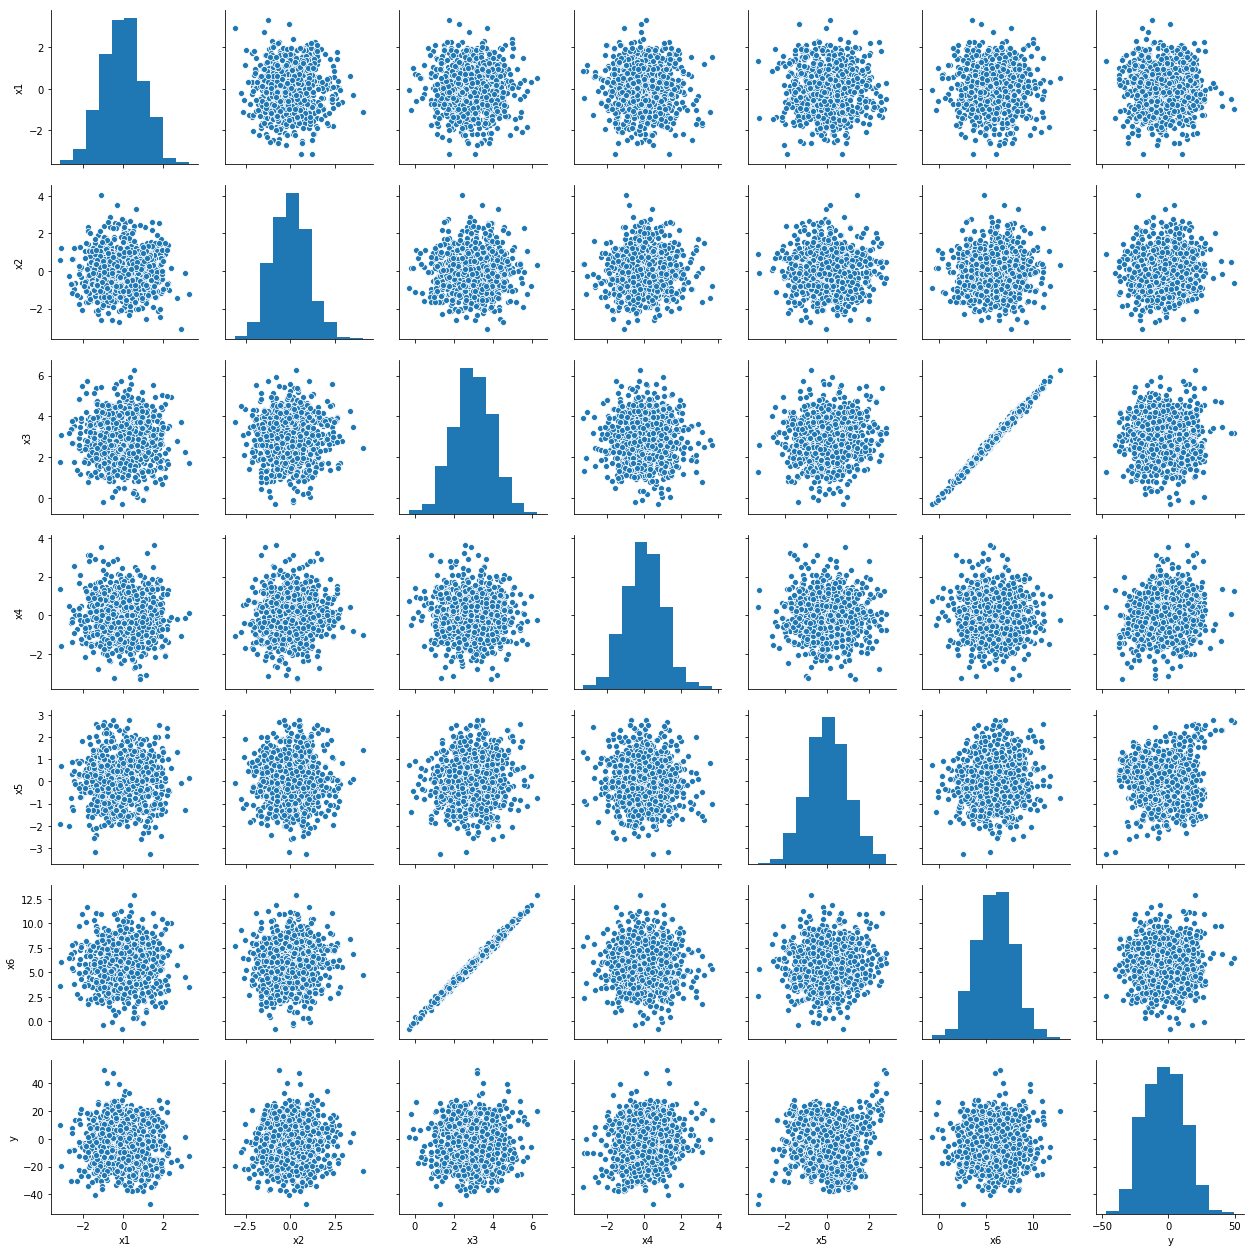

In [5]:
# Numerics
sb.pairplot(df9)

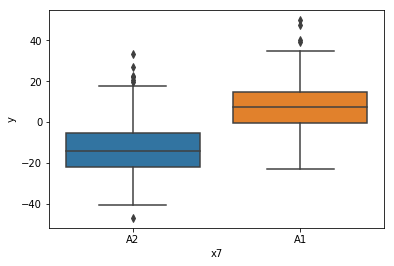

In [6]:
# x7
sb.boxplot(data=df9, x='x7', y='y')

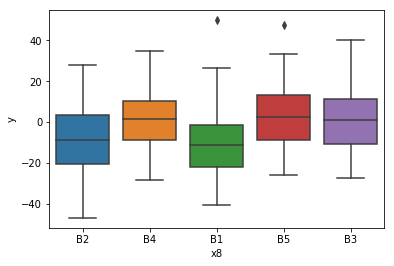

In [7]:
# x8
sb.boxplot(data=df9, x='x8', y='y')

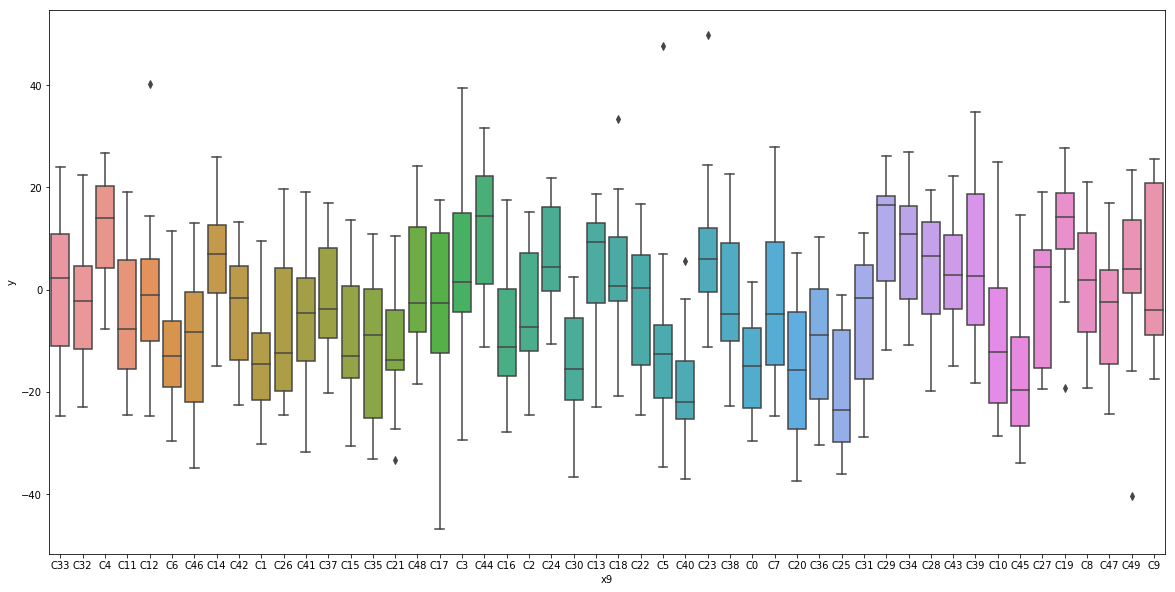

In [8]:
# x9
plt.figure(figsize=(20, 10))
sb.boxplot(data=df9, x='x9', y='y')

In [9]:
# Value counts for x9
df9['x9'].value_counts()

C5     32
C42    30
C7     28
C10    28
C41    26
C38    24
C39    24
C20    24
C34    23
C48    23
C23    23
C3     22
C4     22
C22    21
C17    21
C11    21
C25    21
C44    21
C16    21
C35    21
C28    21
C15    20
C46    20
C45    20
C37    20
C33    20
C1     20
C12    19
C9     19
C30    19
C47    18
C32    18
C19    18
C49    18
C29    18
C2     18
C21    18
C8     18
C13    17
C14    17
C6     17
C26    16
C43    16
C31    16
C40    15
C0     15
C36    14
C24    14
C27    13
C18    12
Name: x9, dtype: int64

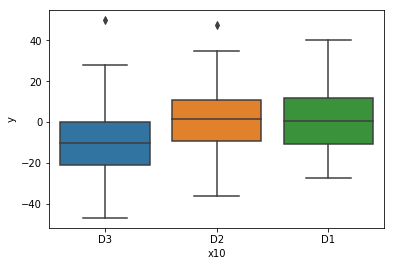

In [10]:
# x10
sb.boxplot(data=df9, x='x10', y='y')

In [11]:
# Any null
df9.isnull().sum()


x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
y      0
dtype: int64

Notes:

- Some variability across all variables.
- Numerics:
    - None seem to obviously have a relationship with y
    - x3 and x6 seem highly correlated
    - x5 seems to have a different distribution than the others because it's outliers don't seem as randomly distributed as the others
- Categoricals:
    - x7/x8/x10 all seem to have some relationship with y
    - x9 has moderate cardinality (~50 values relative to the number of rows, 1k), which means we'll need to be a little careful in modelling it.  It seems at related to y, but hard to tell how well it will generalize with some of the low sample sizes.
- No missing values (at least as far as we can tell so far)

### Let's fit a quick kitchen sink model to start, leaving out x9 for now

In [11]:
# Fit model
model9 = smf.ols(
    formula='y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10',
    data=df9
)
model9_fit = model9.fit()

In [12]:
# Summarize
model9_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     63.03
Date:                Sun, 07 Jun 2020   Prob (F-statistic):          1.06e-289
Time:                        21:49:35   Log-Likelihood:                -3315.4
No. Observations:                1000   AIC:                             6757.
Df Residuals:                     937   BIC:                             7066.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8978      3.463     -3.147      0.002     -17.694      -4.101
x7[T.A2]     -18.5595      0.448    -41.456      0.000     -19.438     -17.681
x8[T.B2]       0.6747      0.712      0.948      0.343      -0.722       2.071
x8[T.B3]      12.4617      2.850      4.373      0.000       6.870      18.054
x8[T.B4]      10.5909      1.618      6.545      0.000       7.415      13.767
x8[T.B5]      10.7043      1.596      6.705      0.000       7.571      13.837
x9[T.C1]       1.6996      2.372      0.717      0.474      -2.955       6.355
x9[T.C10]      0.1449      2.221      0.065      0.948      -4.215       4.505
x9[T.C11]      3.6586      2.352      1.556      0.120      -0.957       8.274
x9[T.C12]      9.1036      2.392      3.806      0.000       4.409      13.798
x9[T.C13]     16.4845      2.459      6.704      0.000      11.659      21.310
x9[T.C14]     17.7467      2.455      7.228      0.000      12.928      22.565
x9[T.C15]      0.4922      2.369      0.208      0.835      -4.157       5.141
x9[T.C16]      4.0173      2.345      1.713      0.087      -0.586       8.620
x9[T.C17]      7.6831      2.340      3.283      0.001       3.090      12.276
x9[T.C18]     19.2491      2.707      7.111      0.000      13.936      24.562
x9[T.C19]     19.3919      2.430      7.979      0.000      14.622      24.161
x9[T.C2]       8.0942      2.430      3.331      0.001       3.325      12.863
x9[T.C20]     -1.1390      2.279     -0.500      0.617      -5.612       3.334
x9[T.C21]      4.0955      2.423      1.690      0.091      -0.660       8.851
x9[T.C22]     10.4297      2.348      4.442      0.000       5.821      15.038
x9[T.C23]     16.3754      2.308      7.096      0.000      11.847      20.904
x9[T.C24]     18.7351      2.570      7.289      0.000      13.691      23.780
x9[T.C25]     -3.7219      2.354     -1.581      0.114      -8.342       0.898
x9[T.C26]      5.2507      2.495      2.105      0.036       0.355      10.146
x9[T.C27]      7.2104      2.636      2.736      0.006       2.038      12.383
x9[T.C28]     15.8174      2.342      6.753      0.000      11.220      20.414
x9[T.C29]     17.8748      2.418      7.393      0.000      13.130      22.620
x9[T.C3]      15.0620      2.320      6.492      0.000      10.509      19.615
x9[T.C30]     -1.5014      2.393     -0.627      0.531      -6.198       3.196
x9[T.C31]      3.6660      2.511      1.460      0.145      -1.262       8.594
x9[T.C32]     10.7693      2.418      4.454      0.000       6.024      15.514
x9[T.C33]     13.5731      2.372      5.723      0.000       8.919      18.228
x9[T.C34]     21.4915      2.307      9.318      0.000      16.965      26.018
x9[T.C35]     -0.6024      2.347     -0.257      0.797      -5.209       4.004
x9[T.C36]      3.1965      2.576      1.241      0.215      -1.859       8.252
x9

Notes:

- Most categorical values seem to have strong effects
- Most numericals, however, don't seem to.  However, keep in mind these are just simple lines we're fitting so far.

Let's look at some plots to assess to the model

In [77]:
def plot_univariate(df, x, y, model_fit, n_bins=10):
    # Add prediction
    df = df.assign(p = model_fit.predict(df))
    
    # If x is numeric, bin into 5 groups
    if df[x].dtype in (np.int64, np.float64):
        df[x] = pd.cut(df[x], n_bins).apply(str)
    
    # Aggregate
    df_agg = (
        df
        .groupby(x)
        .agg(
            n=(y, 'count'),
            y_mean=(y, 'mean'),
            y_sd=(y, 'std'),
            p_mean=('p', 'mean'),
            p_sd=('p', 'std'),
        )
        .reset_index()
    )
    
    print(df_agg)
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20, 10))
    
    # First plot: Counts
    ax1.bar(x, 'n', data=df_agg)
    
    # Second plot: Average actuals and predicted
    #ax2.scatter(x, 'y_mean', data=df_agg, label='Actual', marker='.', color='green', linewidth=3)
    ax2.errorbar(x, 'y_mean', yerr='y_sd', data=df_agg, label='Actual', fmt='o', capsize=10, color='green')
    #ax2.scatter(x, 'p_mean', data=df_agg, label='Predicted', marker='.', color='red', linewidth=3)
    ax2.errorbar(x, 'p_mean', yerr='p_sd', data=df_agg, label='Predicted', fmt='o', capsize=10, color='red')
    
    plt.legend()
    plt.show()

                 x1    n     y_mean       y_sd     p_mean       p_sd
0  (-3.156, -2.508]    7  -6.313165  15.030758  -2.486545  13.484860
1  (-2.508, -1.867]   25  -6.906888  14.180164  -2.623513  13.233818
2  (-1.867, -1.225]   89  -5.867852  14.322453  -3.132469  13.486378
3  (-1.225, -0.584]  179  -0.568878  15.301959  -2.531370  13.259413
4  (-0.584, 0.0577]  234  -0.139050  15.038373  -2.470977  13.674785
5   (0.0577, 0.699]  238  -5.980640  15.042028  -4.490842  14.049541
6    (0.699, 1.341]  136  -2.863535  14.968506  -1.530366  13.915326
7    (1.341, 1.982]   77  -4.701234  15.187662  -4.526386  13.262038
8    (1.982, 2.624]   11  -1.328889  15.699184  -4.350324  11.151509
9    (2.624, 3.265]    4 -11.520226   8.920396 -10.638507   5.201855


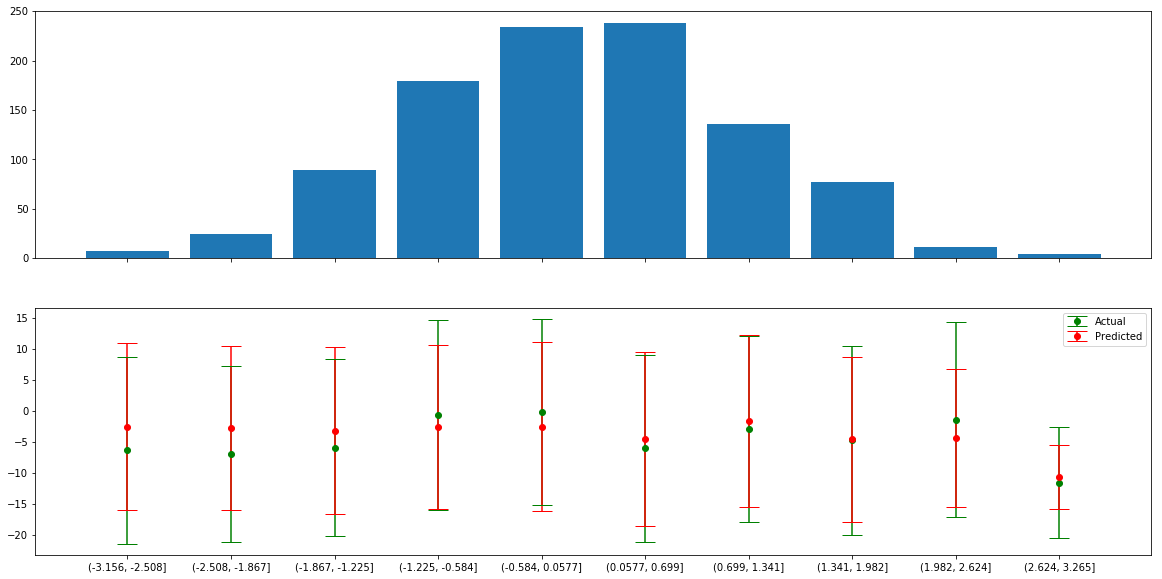

In [78]:
# x1
plot_univariate(df9, 'x1', 'y', model9_fit)

Not doing well on the edges, but could be due to low sample sizes.

                 x2    n    y_mean       y_sd    p_mean       p_sd
0  (-3.114, -2.394]    6 -8.036651  12.048253 -5.283652   9.208702
1  (-2.394, -1.681]   33 -8.330209  12.432936 -7.453790  13.097655
2  (-1.681, -0.967]  142 -4.265981  13.981517 -4.363413  13.995175
3  (-0.967, -0.254]  228 -3.445199  15.719105 -3.542508  13.639869
4   (-0.254, 0.459]  273 -2.558462  15.349517 -2.458943  13.486708
5    (0.459, 1.172]  205 -2.208190  16.058501 -2.623835  13.819225
6    (1.172, 1.886]   72 -2.226685  14.414956 -2.060641  13.331194
7    (1.886, 2.599]   33 -0.980166  13.639297 -1.506372  13.612027
8    (2.599, 3.312]    5 -5.989441  12.153853 -2.307758  11.611117
9    (3.312, 4.026]    3 -6.950856  14.290031  4.923138  14.332236


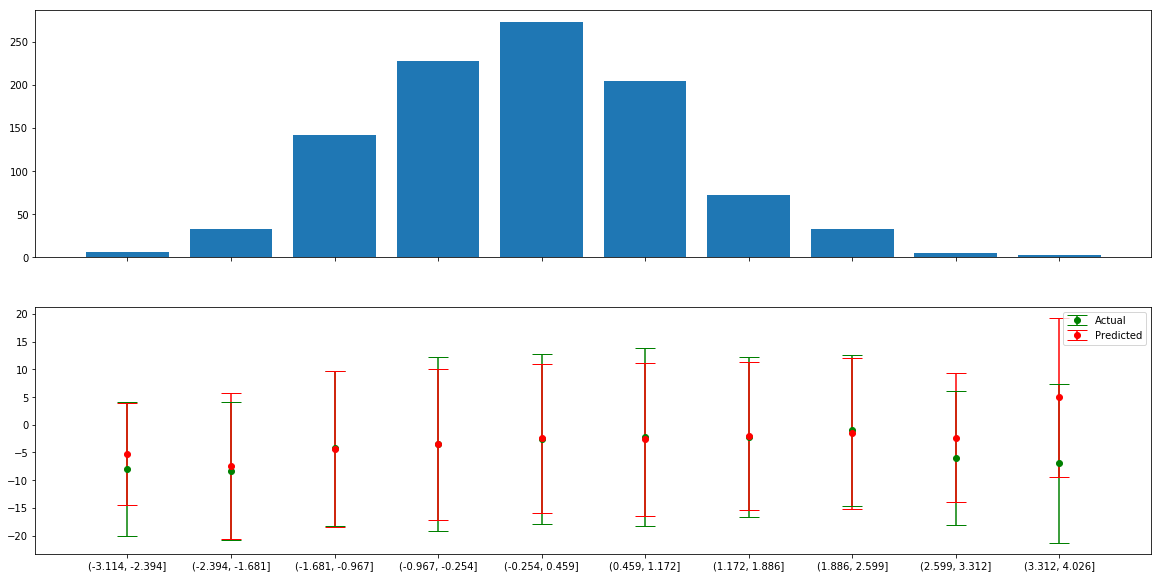

In [79]:
# x2
plot_univariate(df9, 'x2', 'y', model9_fit)

Also not doing well on the edges, but could be due to low sample sizes.

                x3    n    y_mean       y_sd    p_mean       p_sd
0  (-0.298, 0.364]    8  3.606228  14.675116  2.897787  13.933571
1    (0.364, 1.02]   17 -8.370971  11.552303 -7.363351  10.500642
2    (1.02, 1.675]   82 -4.374112  15.526482 -3.433005  15.047314
3   (1.675, 2.331]  149 -1.796373  15.092307 -2.523480  13.606921
4   (2.331, 2.986]  251 -4.587268  14.915665 -4.710165  13.308997
5   (2.986, 3.642]  235 -2.146294  15.531851 -2.396111  13.437335
6   (3.642, 4.298]  172 -3.448702  14.912676 -2.723662  14.101844
7   (4.298, 4.953]   63 -1.299861  15.500577 -1.180692  13.314858
8   (4.953, 5.609]   19 -2.600386  15.980956 -4.238468  10.959398
9   (5.609, 6.265]    4  2.763763  15.246697  4.806128  14.410473


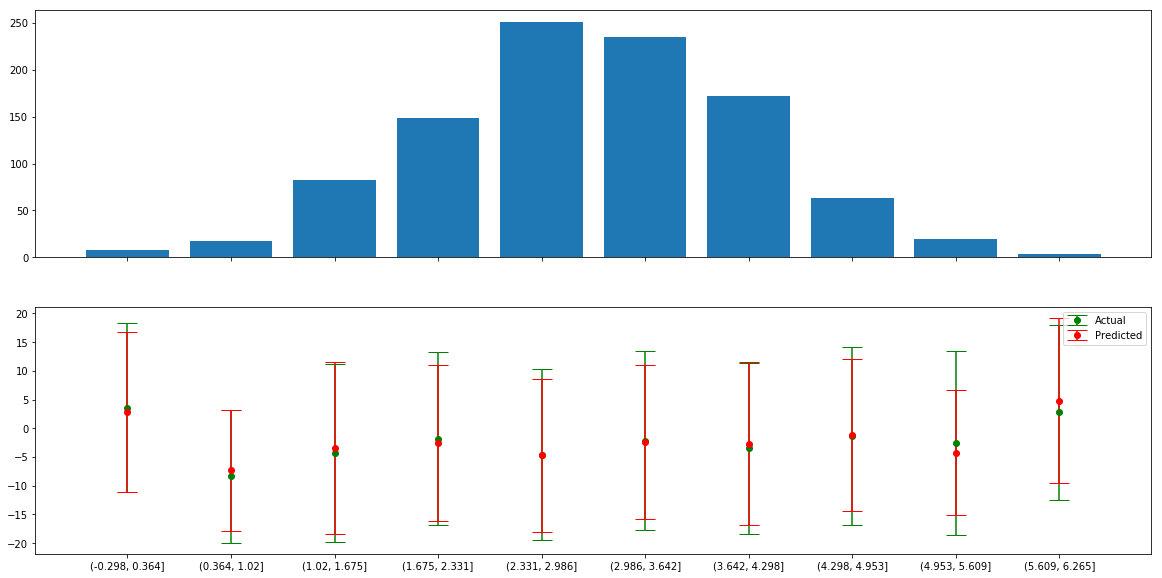

In [80]:
# x3
plot_univariate(df9, 'x3', 'y', model9_fit)

                 x4    n     y_mean       y_sd     p_mean       p_sd
0  (-3.294, -2.595]    8 -10.219785  14.908367 -11.611043  17.743004
1  (-2.595, -1.904]   22  -6.542120  17.129693  -5.865363  15.921512
2  (-1.904, -1.213]   97  -3.782665  15.173689  -3.820962  13.429683
3  (-1.213, -0.521]  180  -6.451188  15.809415  -6.128142  13.762621
4    (-0.521, 0.17]  257  -1.539984  15.472959  -2.179555  13.621435
5     (0.17, 0.861]  237  -4.559496  14.172977  -4.206035  13.330072
6    (0.861, 1.553]  143   0.219736  15.019398   0.196369  12.951026
7    (1.553, 2.244]   39   0.143603  11.568106   1.050832  11.740426
8    (2.244, 2.935]   12   3.327154  11.342277   2.905247   9.570217
9    (2.935, 3.627]    5   8.849646  13.003119   7.935628  12.926911


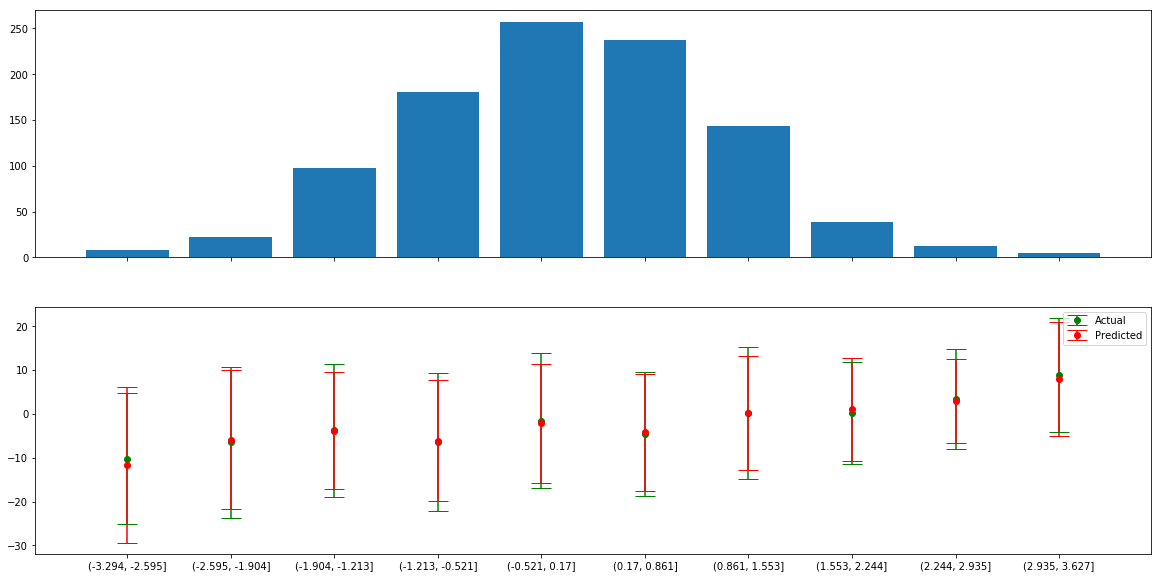

In [81]:
# x4
plot_univariate(df9, 'x4', 'y', model9_fit)

                 x5    n     y_mean       y_sd     p_mean       p_sd
0  (-3.291, -2.678]    2 -43.630432   4.531699 -15.576906   8.092240
1  (-2.678, -2.071]    9 -10.075823  12.774264  -5.565235  10.268027
2  (-2.071, -1.464]   52   2.301504  15.530816  -1.914785  14.626569
3  (-1.464, -0.857]  111  -0.591558  12.315051  -4.497209  11.925385
4  (-0.857, -0.251]  212  -0.203367  14.372136  -1.733879  13.935266
5   (-0.251, 0.356]  244  -5.890977  13.968151  -3.962105  13.849723
6    (0.356, 0.963]  200  -7.907987  14.300837  -3.651065  13.784056
7     (0.963, 1.57]  107  -5.480283  14.574254  -2.795501  13.693241
8     (1.57, 2.177]   46   5.049507  14.550971  -0.808374  13.103094
9    (2.177, 2.783]   17  25.361991  15.415730  -1.655538  13.905899


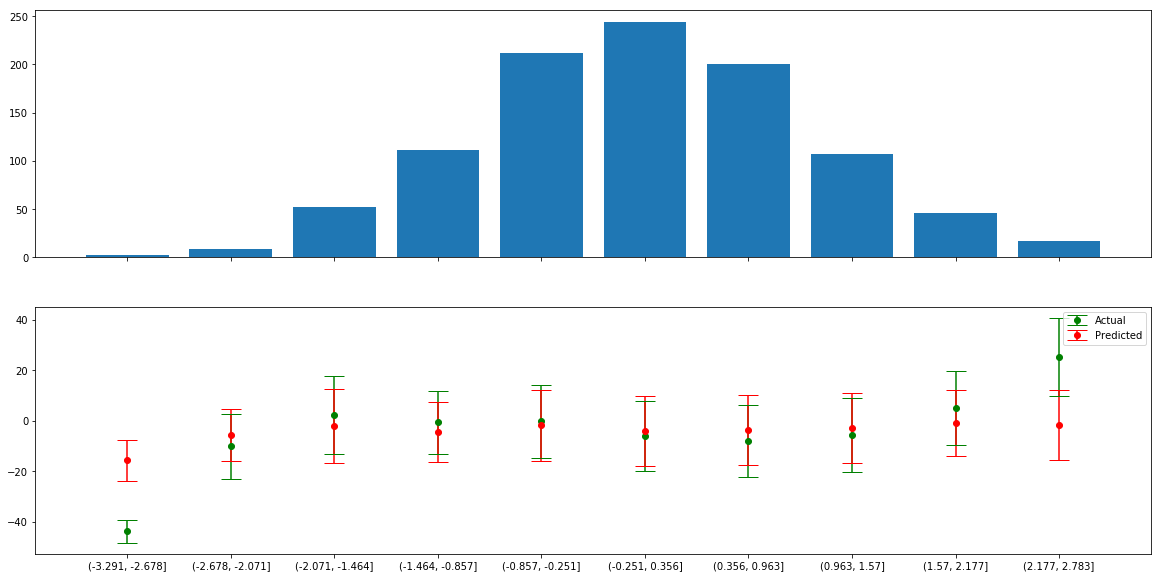

In [82]:
# x5
plot_univariate(df9, 'x5', 'y', model9_fit)

                 x6    n    y_mean       y_sd    p_mean       p_sd
0   (-0.779, 0.601]    7  6.032471  14.011070  4.764661  13.927423
1    (0.601, 1.968]   17 -6.701305  11.019841 -5.135844  10.660778
2    (1.968, 3.334]   82 -4.892416  15.179086 -4.402334  14.655740
3    (3.334, 4.701]  168 -1.806620  15.186986 -2.300663  13.543952
4    (4.701, 6.068]  245 -4.811870  15.378084 -4.871422  13.594379
5    (6.068, 7.434]  249 -1.590667  15.008175 -1.722706  13.360149
6    (7.434, 8.801]  161 -3.835361  14.651628 -3.087794  13.869828
7   (8.801, 10.168]   52 -2.326140  16.530921 -2.792933  13.398403
8  (10.168, 11.534]   16 -1.220950  16.169758 -2.932891  12.341993
9  (11.534, 12.901]    3  0.120046  17.514485  1.402845  15.556304


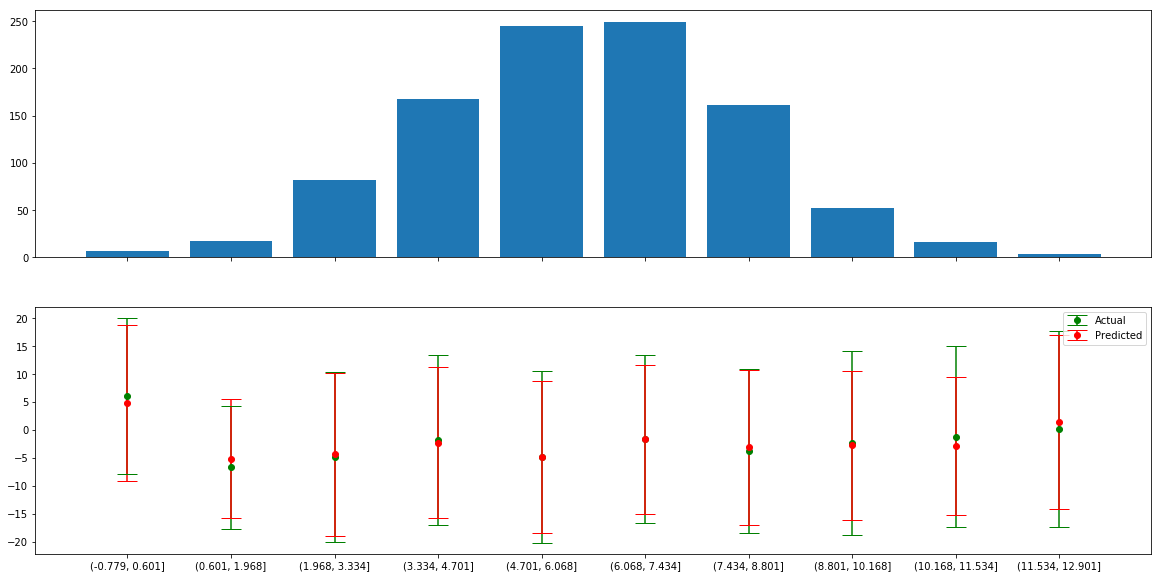

In [83]:
# x6
plot_univariate(df9, 'x6', 'y', model9_fit)

   x7    n     y_mean       y_sd     p_mean      p_sd
0  A1  508   6.709537  11.340405   6.709537  9.088018
1  A2  492 -13.246832  11.486507 -13.246832  9.436457


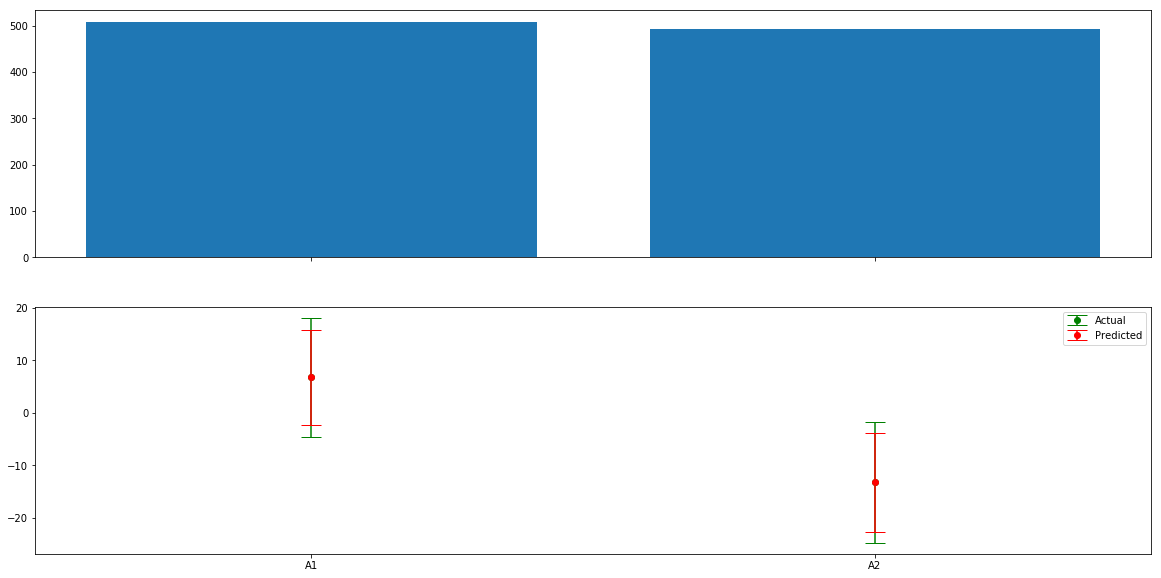

In [84]:
# x7
plot_univariate(df9, 'x7', 'y', model9_fit)

   x8    n     y_mean       y_sd     p_mean       p_sd
0  B1  231 -10.670510  14.192590 -10.670510  12.463333
1  B2  170  -8.561023  14.859238  -8.561023  13.150058
2  B3  218   0.840592  14.367412   0.840592  12.341517
3  B4  170   0.955568  13.056131   0.955568  11.994859
4  B5  211   2.206488  14.116294   2.206488  12.418269


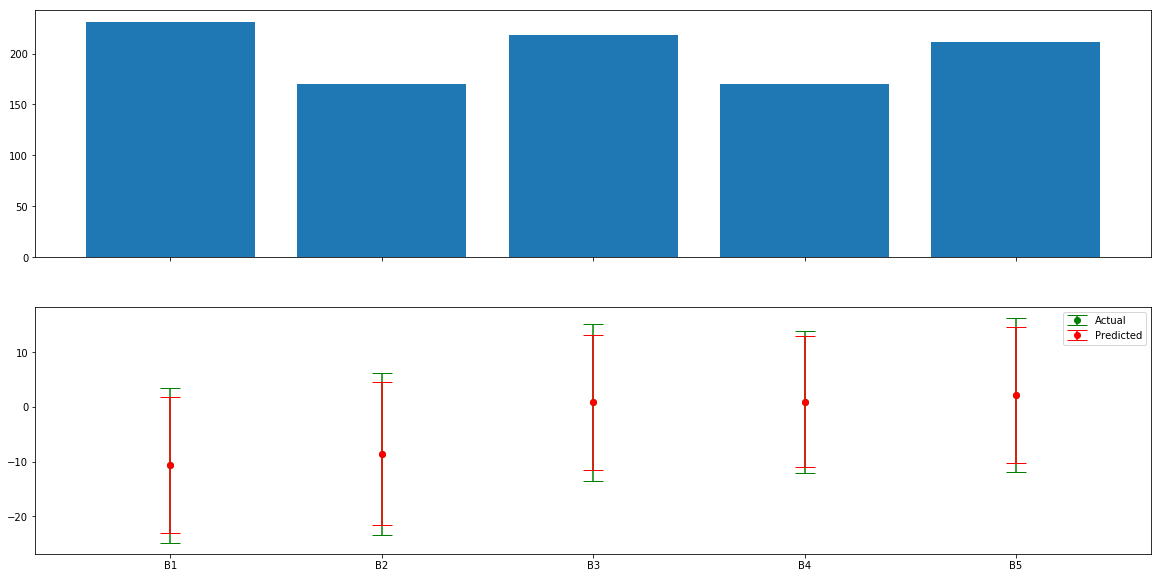

In [85]:
# x8
plot_univariate(df9, 'x8', 'y', model9_fit)

     x9   n     y_mean       y_sd     p_mean       p_sd
0    C0  15 -14.964970  10.589358 -14.964970   9.686287
1    C1  20 -13.259830  11.731550 -13.259830  10.585927
2   C10  28 -10.318145  13.439793 -10.318145  11.593083
3   C11  21  -4.835676  13.653536  -4.835676  12.706795
4   C12  19  -1.179628  14.839631  -1.179628  11.316309
5   C13  17   3.900295  12.651150   3.900295  13.089688
6   C14  17   5.196334  10.934525   5.196334  10.820817
7   C15  20  -9.186914  12.671340  -9.186914   9.928344
8   C16  21  -8.366996  12.107585  -8.366996  12.517309
9   C17  21  -3.341562  16.038038  -3.341562  11.016408
10  C18  12   3.346333  14.467222   3.346333   9.875748
11  C19  18  11.671869  11.388049  11.671869   9.326149
12   C2  18  -4.783132  12.484306  -4.783132   9.556890
13  C20  24 -15.938042  14.072403 -15.938042  11.550987
14  C21  18 -11.672869  11.694724 -11.672869  10.494849
15  C22  21  -2.830809  12.411048  -2.830809  12.914849
16  C23  23   7.584358  13.240892   7.584358   8

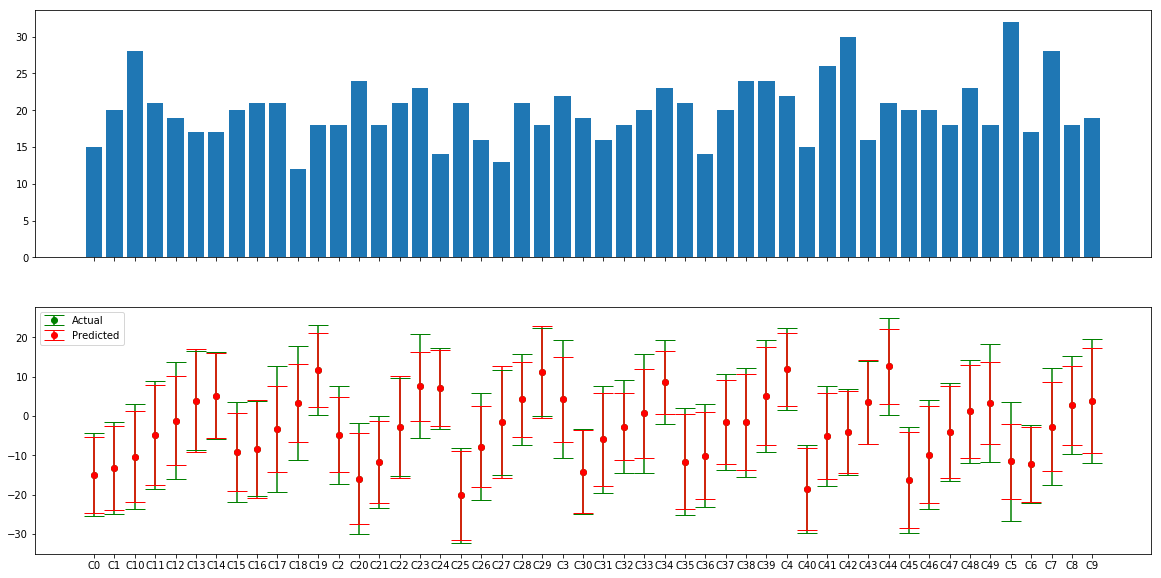

In [86]:
# x9
plot_univariate(df9, 'x9', 'y', model9_fit)

  x10    n    y_mean       y_sd    p_mean       p_sd
0  D1  209  0.781634  14.500883  0.781634  12.421827
1  D2  412  0.869159  14.108635  0.869159  12.661794
2  D3  379 -9.579029  14.404048 -9.579029  12.765573


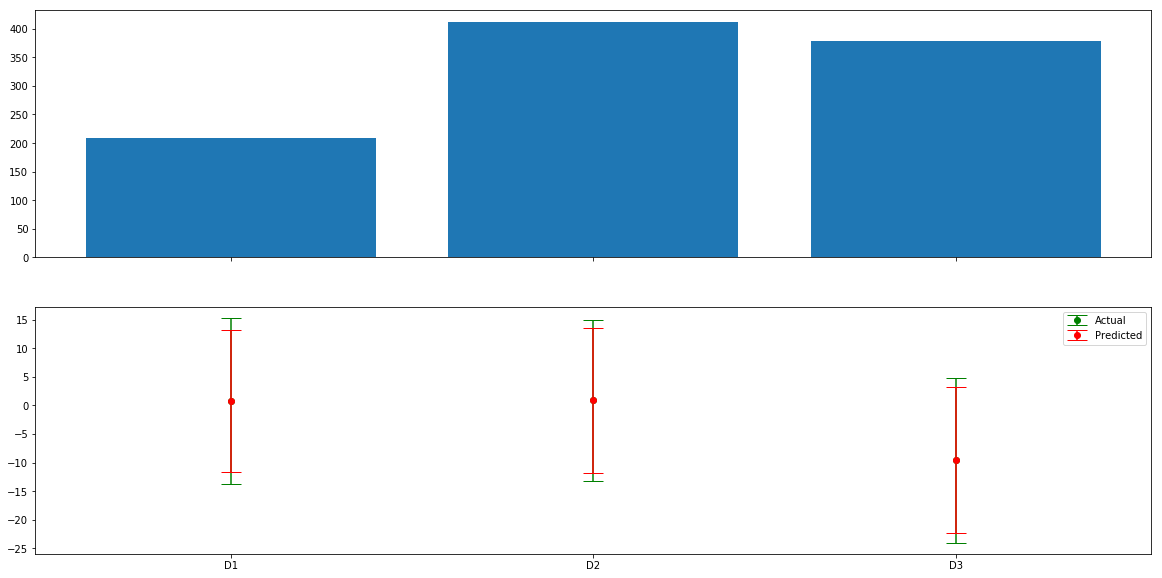

In [87]:
# x10
plot_univariate(df9, 'x10', 'y', model9_fit, n_bins=5)

Notes:

- Numerics
    - x4 is the only one with a seemlingly linear effect
    - Most others vary more in the far left/right values, with:
        - x1 bounces between over and underpredicting (maybe cubic?)
        - x2 overpredicting towards the ends (maybe parabolic?)
        - x3 same as x1
        - x5 same as x1
        - x6 underpredicting on left, overpredicting on right, and underpredicting a lot on far right (maybe cubic?)
- Categoricals
    - Estimated effects seem good
    

### Now, try some stuff to improve the model fit

From here we have a few options to try to include:

- Test some non-linear effects
- See if any of these variables have a notable interaction effect with each other
    - Start with the categorical variables interacting with the numerics, the effects are relatively large and might inform underlying distribution differences
- Improve how we're fitting x9
    - Only have 10-20 observations should make us concerns about generalizability
    
Let's start with some non-linear effects

In [88]:
# Fit model
model9_nonlinear = smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   x2 + np.power(x2, 2) +
                   x3 + np.power(x3, 2) + np.power(x3, 3) +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x6 + np.power(x6, 2) + np.power(x6, 3) + 
                   x7 + x8 + x9 + x10''',
    data=df9
)
model9_nonlinear_fit = model9_nonlinear.fit()

In [89]:
# Summarize
model9_nonlinear_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     181.3
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:08:25   Log-Likelihood:                -2787.3
No. Observations:                1000   AIC:                             5719.
Df Residuals:                     928   BIC:                             6072.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.2947      2.302     -5.340      0.000     -16.813      -7.776
x7[T.A2]          -18.4496      0.266    -69.366      0.000     -18.972     -17.928
x8[T.B2]            0.4927      0.424      1.161      0.246      -0.340       1.326
x8[T.B3]           13.4556      1.693      7.949      0.000      10.133      16.778
x8[T.B4]           10.3360      0.965     10.715      0.000       8.443      12.229
x8[T.B5]           10.5089      0.952     11.034      0.000       8.640      12.378
x9[T.C1]            2.0266      1.408      1.440      0.150      -0.736       4.789
x9[T.C10]          -0.9418      1.318     -0.714      0.475      -3.529       1.645
x9[T.C11]           3.0148      1.397      2.158      0.031       0.273       5.756
x9[T.C12]           7.2450      1.419      5.104      0.000       4.459      10.030
x9[T.C13]          14.8867      1.460     10.193      0.000      12.020      17.753
x9[T.C14]          17.6101      1.459     12.069      0.000      14.746      20.474
x9[T.C15]          -0.1275      1.406     -0.091      0.928      -2.888       2.633
x9[T.C16]           2.7895      1.393      2.003      0.045       0.056       5.522
x9[T.C17]           9.5831      1.395      6.868      0.000       6.845      12.322
x9[T.C18]          14.9473      1.611      9.279      0.000      11.786      18.109
x9[T.C19]          19.2217      1.446     13.292      0.000      16.384      22.060
x9[T.C2]            7.4483      1.446      5.150      0.000       4.610      10.287
x9[T.C20]          -1.2336      1.353     -0.911      0.362      -3.890       1.423
x9[T.C21]           3.7459      1.438      2.605      0.009       0.924       6.567
x9[T.C22]           9.4438      1.395      6.770      0.000       6.706      12.181
x9[T.C23]          14.7123      1.378     10.678      0.000      12.008      17.416
x9[T.C24]          19.0184      1.525     12.475      0.000      16.026      22.010
x9[T.C25]          -1.7970      1.403     -1.281      0.201      -4.551       0.957
x9[T.C26]           3.6631      1.483      2.470      0.014       0.752       6.574
x9[T.C27]           8.3885      1.568      5.348      0.000       5.310      11.466
x9[T.C28]          14.2987      1.393     10.265      0.000      11.565      17.032
x9[T.C29]          19.8948      1.438     13.837      0.000      17.073      22.717
x9[T.C3]           14.8489      1.378     10.774      0.000      12.144      17.554
x9[T.C30]          -1.8646      1.422     -1.312      0.190      -4.654       0.925
x9[T.C31]           3.8396      1.495      2.569      0.010       0.906       6.773
x9[T.C32]           8.5080      1.440      5.907      0.000       5.682      11.334
x9[T.C33]          12.9863      1.414      9.186      0.000      10.212      15.761
x9[T.C34]          18.7705      1.372     13.683      0.000

Notes:

- Numerics
    - x4 still has significant linear effect
    - x1 and x5 have significant 2- and 3-power effects
    - x2 has a significant 2-power effect but not a linear effect, and is negative (i.e. opens downwards)
    - We get the "strong multicollinearity" error, probably due to x3 and x6 being so strongly correlated.  Let's drop one arbitrarily in favor of the other (keep x6 because 6 is clearly a better number than 3)
- Categoricals
    - Don't really change from the previous model

Let's reassess the univariates for numerics.

                 x1    n     y_mean       y_sd     p_mean       p_sd
0  (-3.156, -2.508]    7  -6.313165  15.030758 -10.304672  13.237420
1  (-2.508, -1.867]   25  -6.906888  14.180164  -7.210015  13.847192
2  (-1.867, -1.225]   89  -5.867852  14.322453  -3.709473  14.071177
3  (-1.225, -0.584]  179  -0.568878  15.301959  -0.980330  14.317948
4  (-0.584, 0.0577]  234  -0.139050  15.038373  -1.909635  14.708617
5   (0.0577, 0.699]  238  -5.980640  15.042028  -4.518281  15.002040
6    (0.699, 1.341]  136  -2.863535  14.968506  -2.383473  14.317540
7    (1.341, 1.982]   77  -4.701234  15.187662  -5.729996  15.096425
8    (1.982, 2.624]   11  -1.328889  15.699184  -2.206569  15.123878
9    (2.624, 3.265]    4 -11.520226   8.920396  -9.787943   9.429805


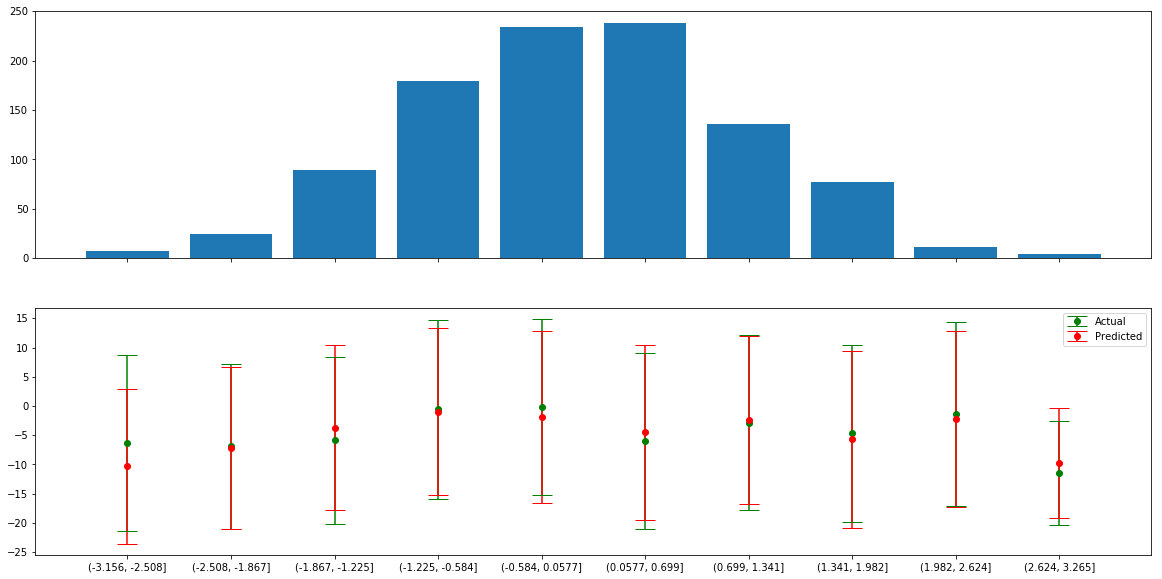

In [104]:
# x1
plot_univariate(df9, 'x1', 'y', model9_nonlinear_fit)

                 x2    n    y_mean       y_sd    p_mean       p_sd
0  (-3.114, -2.394]    6 -8.036651  12.048253 -3.738996  12.261169
1  (-2.394, -1.681]   33 -8.330209  12.432936 -8.392594  14.029164
2  (-1.681, -0.967]  142 -4.265981  13.981517 -4.857530  14.480173
3  (-0.967, -0.254]  228 -3.445199  15.719105 -3.259746  14.735383
4   (-0.254, 0.459]  273 -2.558462  15.349517 -2.283362  14.076705
5    (0.459, 1.172]  205 -2.208190  16.058501 -2.423861  15.445419
6    (1.172, 1.886]   72 -2.226685  14.414956 -2.177756  14.785324
7    (1.886, 2.599]   33 -0.980166  13.639297 -2.244892  15.307701
8    (2.599, 3.312]    5 -5.989441  12.153853 -4.767617  11.752451
9    (3.312, 4.026]    3 -6.950856  14.290031 -0.549579  11.880178


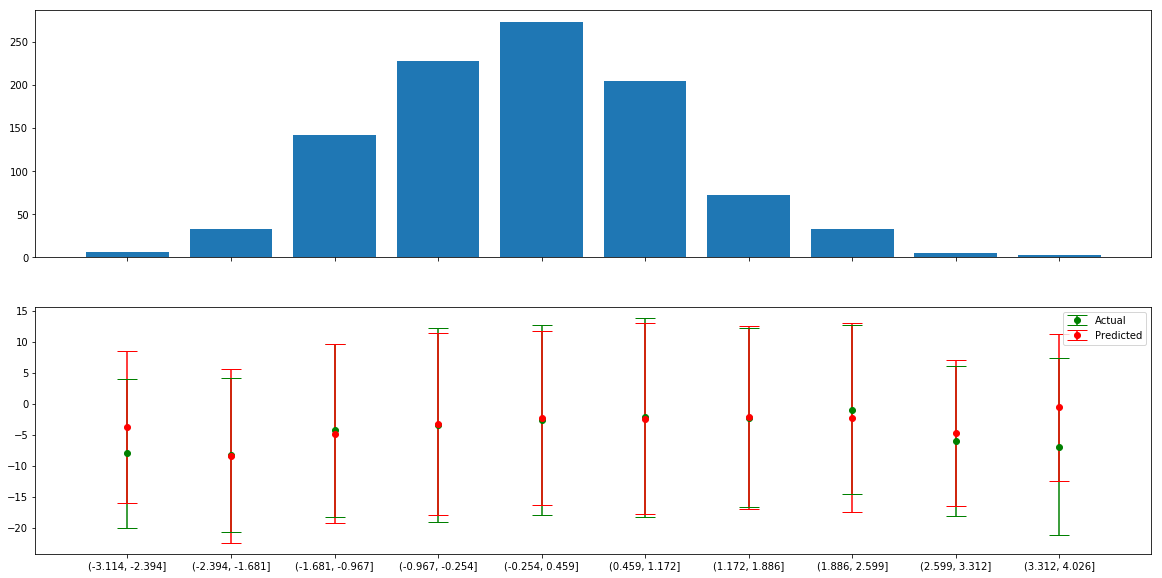

In [105]:
# x2
plot_univariate(df9, 'x2', 'y', model9_nonlinear_fit)

                x3    n    y_mean       y_sd    p_mean       p_sd
0  (-0.298, 0.364]    8  3.606228  14.675116  2.488210  15.888835
1    (0.364, 1.02]   17 -8.370971  11.552303 -7.766697  10.236322
2    (1.02, 1.675]   82 -4.374112  15.526482 -4.006762  15.656253
3   (1.675, 2.331]  149 -1.796373  15.092307 -2.006544  14.866428
4   (2.331, 2.986]  251 -4.587268  14.915665 -4.733586  14.268994
5   (2.986, 3.642]  235 -2.146294  15.531851 -2.089553  15.068594
6   (3.642, 4.298]  172 -3.448702  14.912676 -3.383163  13.951171
7   (4.298, 4.953]   63 -1.299861  15.500577 -1.033676  14.762259
8   (4.953, 5.609]   19 -2.600386  15.980956 -3.242212  15.045209
9   (5.609, 6.265]    4  2.763763  15.246697  4.615883  17.132661


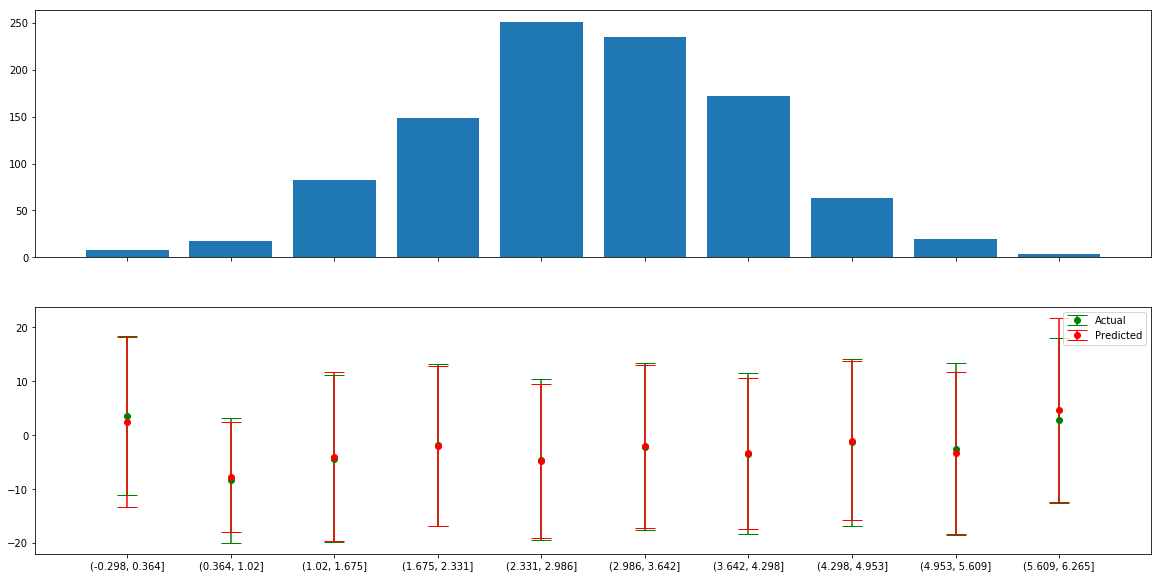

In [106]:
# x3
plot_univariate(df9, 'x3', 'y', model9_nonlinear_fit)

                 x4    n     y_mean       y_sd    p_mean       p_sd
0  (-3.294, -2.595]    8 -10.219785  14.908367 -8.860255  14.139864
1  (-2.595, -1.904]   22  -6.542120  17.129693 -6.241683  16.474506
2  (-1.904, -1.213]   97  -3.782665  15.173689 -3.868269  14.630382
3  (-1.213, -0.521]  180  -6.451188  15.809415 -5.897311  15.316079
4    (-0.521, 0.17]  257  -1.539984  15.472959 -2.227262  15.045562
5     (0.17, 0.861]  237  -4.559496  14.172977 -4.501919  13.579358
6    (0.861, 1.553]  143   0.219736  15.019398  0.339030  14.488714
7    (1.553, 2.244]   39   0.143603  11.568106  0.689930  11.243035
8    (2.244, 2.935]   12   3.327154  11.342277  4.346294  10.942422
9    (2.935, 3.627]    5   8.849646  13.003119  9.551488  13.454117


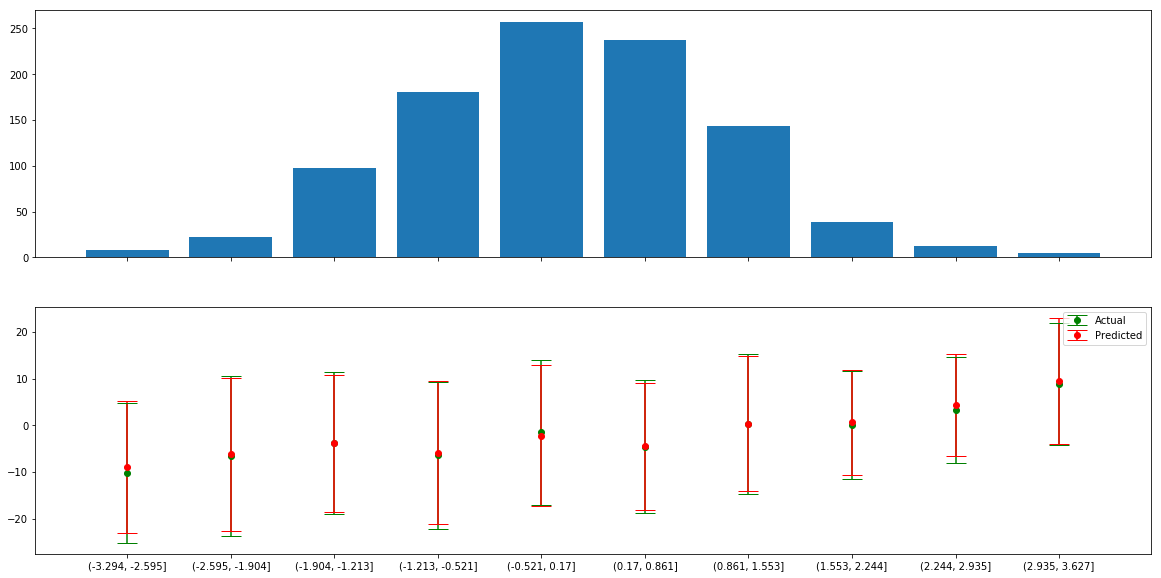

In [107]:
# x4
plot_univariate(df9, 'x4', 'y', model9_nonlinear_fit)

                 x5    n     y_mean       y_sd     p_mean       p_sd
0  (-3.291, -2.678]    2 -43.630432   4.531699 -44.621605  11.483216
1  (-2.678, -2.071]    9 -10.075823  12.774264  -9.001503  11.853503
2  (-2.071, -1.464]   52   2.301504  15.530816   1.553696  14.978985
3  (-1.464, -0.857]  111  -0.591558  12.315051  -0.158106  11.754786
4  (-0.857, -0.251]  212  -0.203367  14.372136  -0.280724  14.049845
5   (-0.251, 0.356]  244  -5.890977  13.968151  -6.000157  13.619258
6    (0.356, 0.963]  200  -7.907987  14.300837  -7.911755  13.637933
7     (0.963, 1.57]  107  -5.480283  14.574254  -5.306954  13.483523
8     (1.57, 2.177]   46   5.049507  14.550971   5.533544  13.679356
9    (2.177, 2.783]   17  25.361991  15.415730  24.542436  15.010194


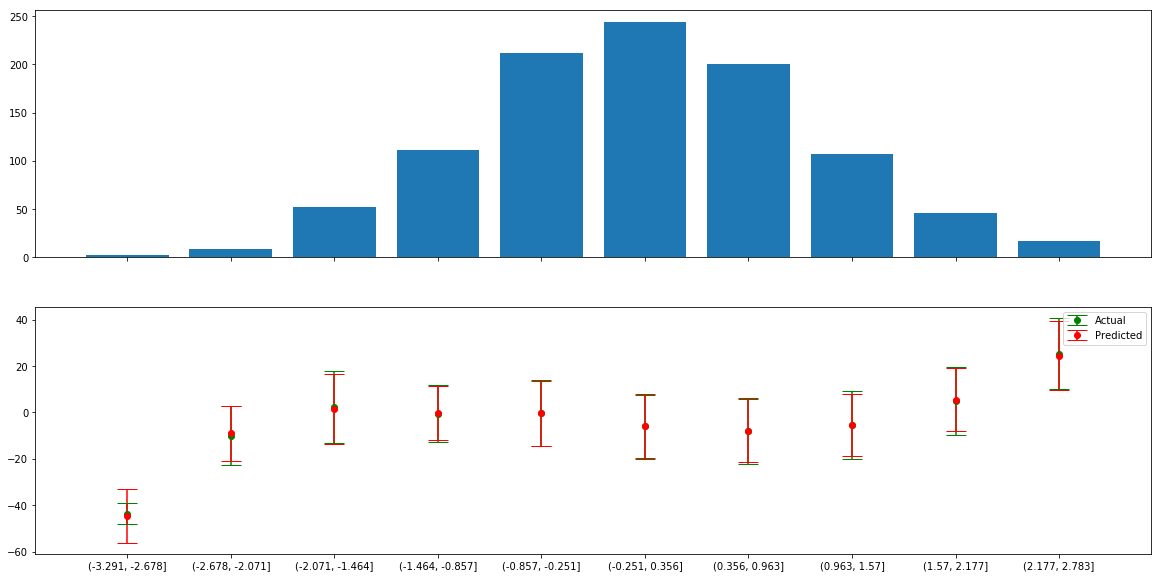

In [108]:
# x5
plot_univariate(df9, 'x5', 'y', model9_nonlinear_fit)

                 x6    n    y_mean       y_sd    p_mean       p_sd
0   (-0.779, 0.601]    7  6.032471  14.011070  5.038022  15.292150
1    (0.601, 1.968]   17 -6.701305  11.019841 -5.916457  10.631658
2    (1.968, 3.334]   82 -4.892416  15.179086 -4.769068  15.305302
3    (3.334, 4.701]  168 -1.806620  15.186986 -1.916586  14.799313
4    (4.701, 6.068]  245 -4.811870  15.378084 -4.844575  14.766640
5    (6.068, 7.434]  249 -1.590667  15.008175 -1.551922  14.523287
6    (7.434, 8.801]  161 -3.835361  14.651628 -3.902260  13.779003
7   (8.801, 10.168]   52 -2.326140  16.530921 -2.042581  15.579318
8  (10.168, 11.534]   16 -1.220950  16.169758 -1.363514  15.977639
9  (11.534, 12.901]    3  0.120046  17.514485 -0.329851  17.132728


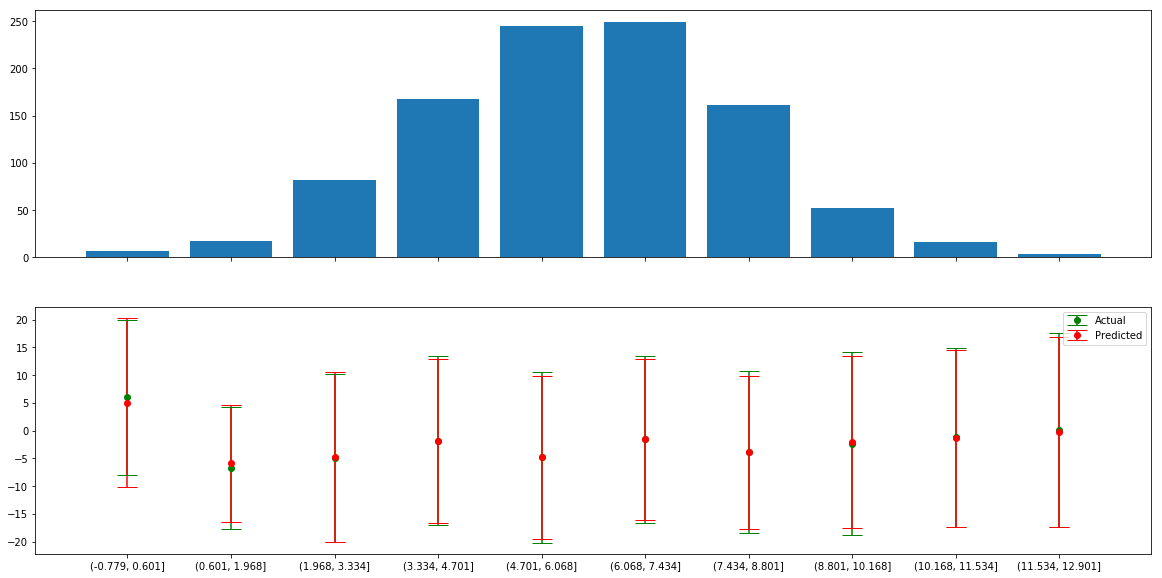

In [109]:
# x6
plot_univariate(df9, 'x6', 'y', model9_nonlinear_fit)

x1, x2, and x5 do look a bit better, so let's keep the effects for now.

Now let's jump to categorical * numerical effects.  For each categorical, let's do a scatterplot of the numerics colored by the values.

C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


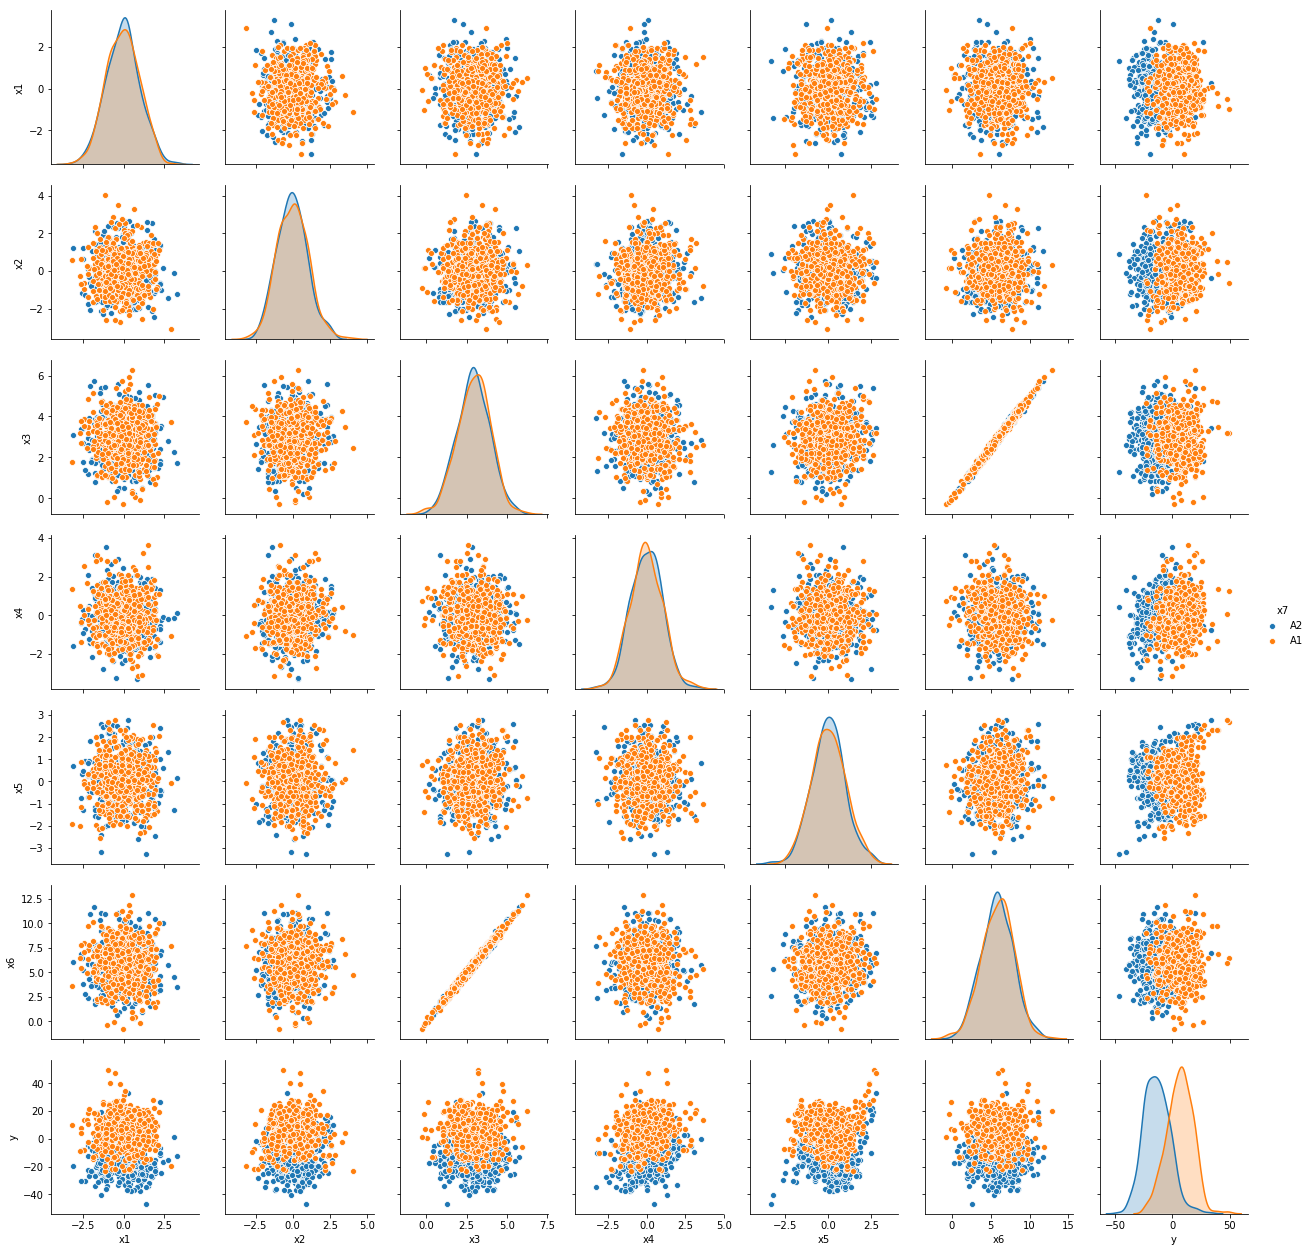

In [110]:
# x7
sb.pairplot(df9, hue='x7')

C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


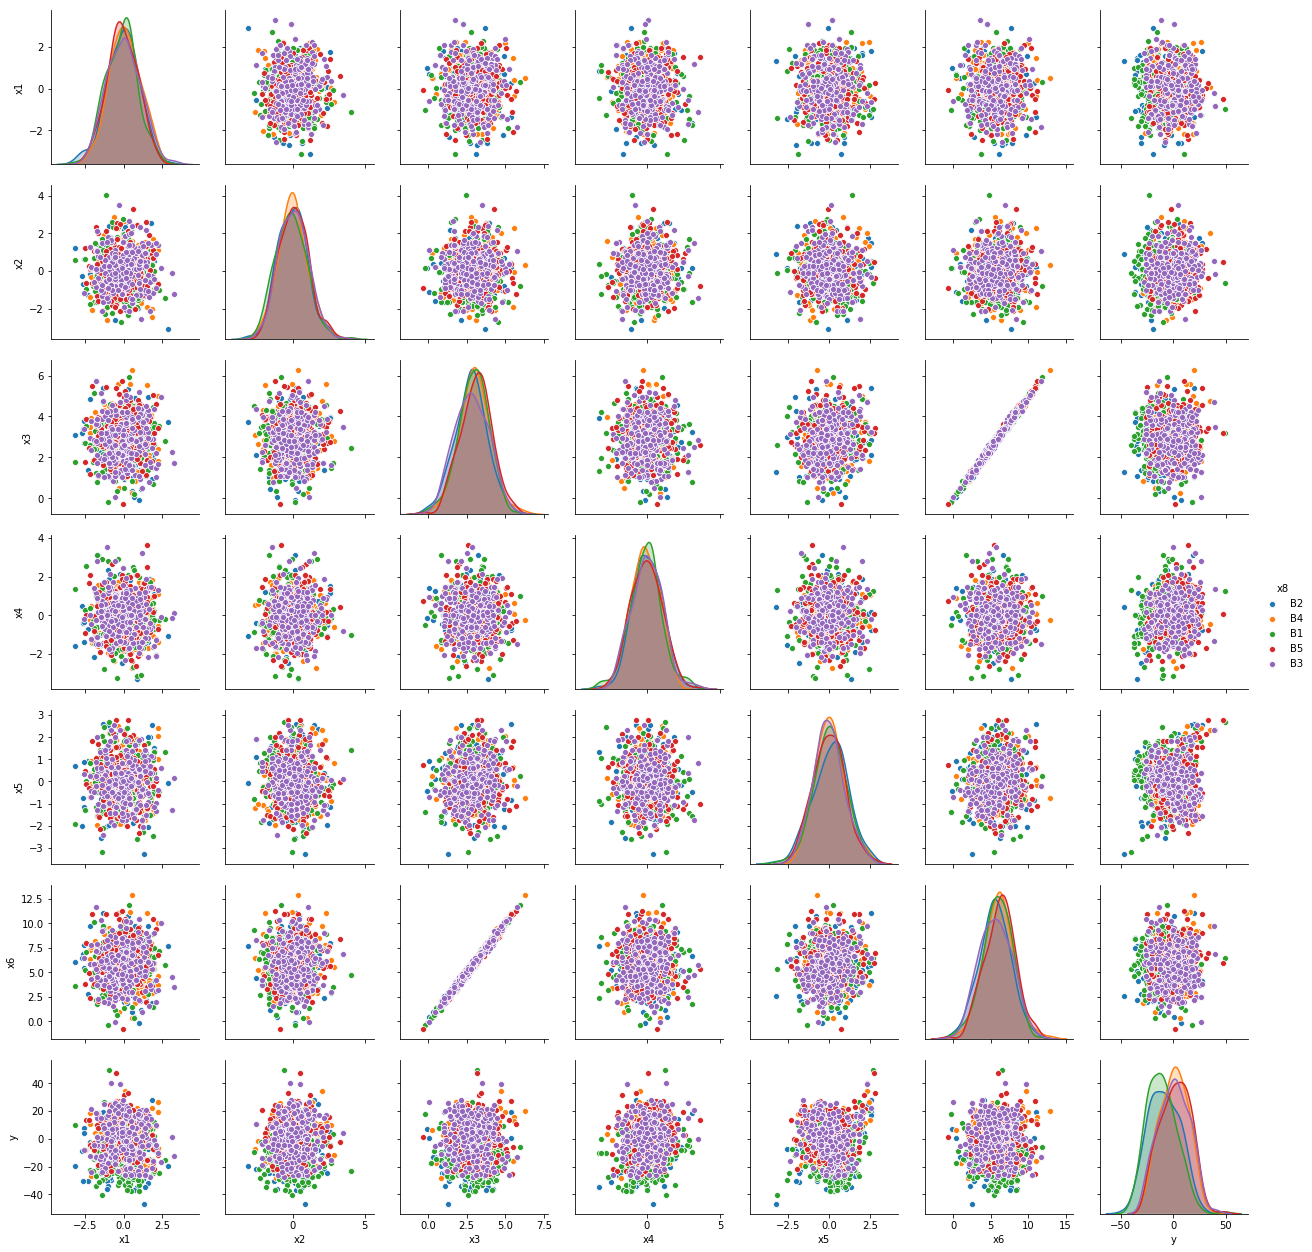

In [111]:
# x8
sb.pairplot(df9, hue='x8')

C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


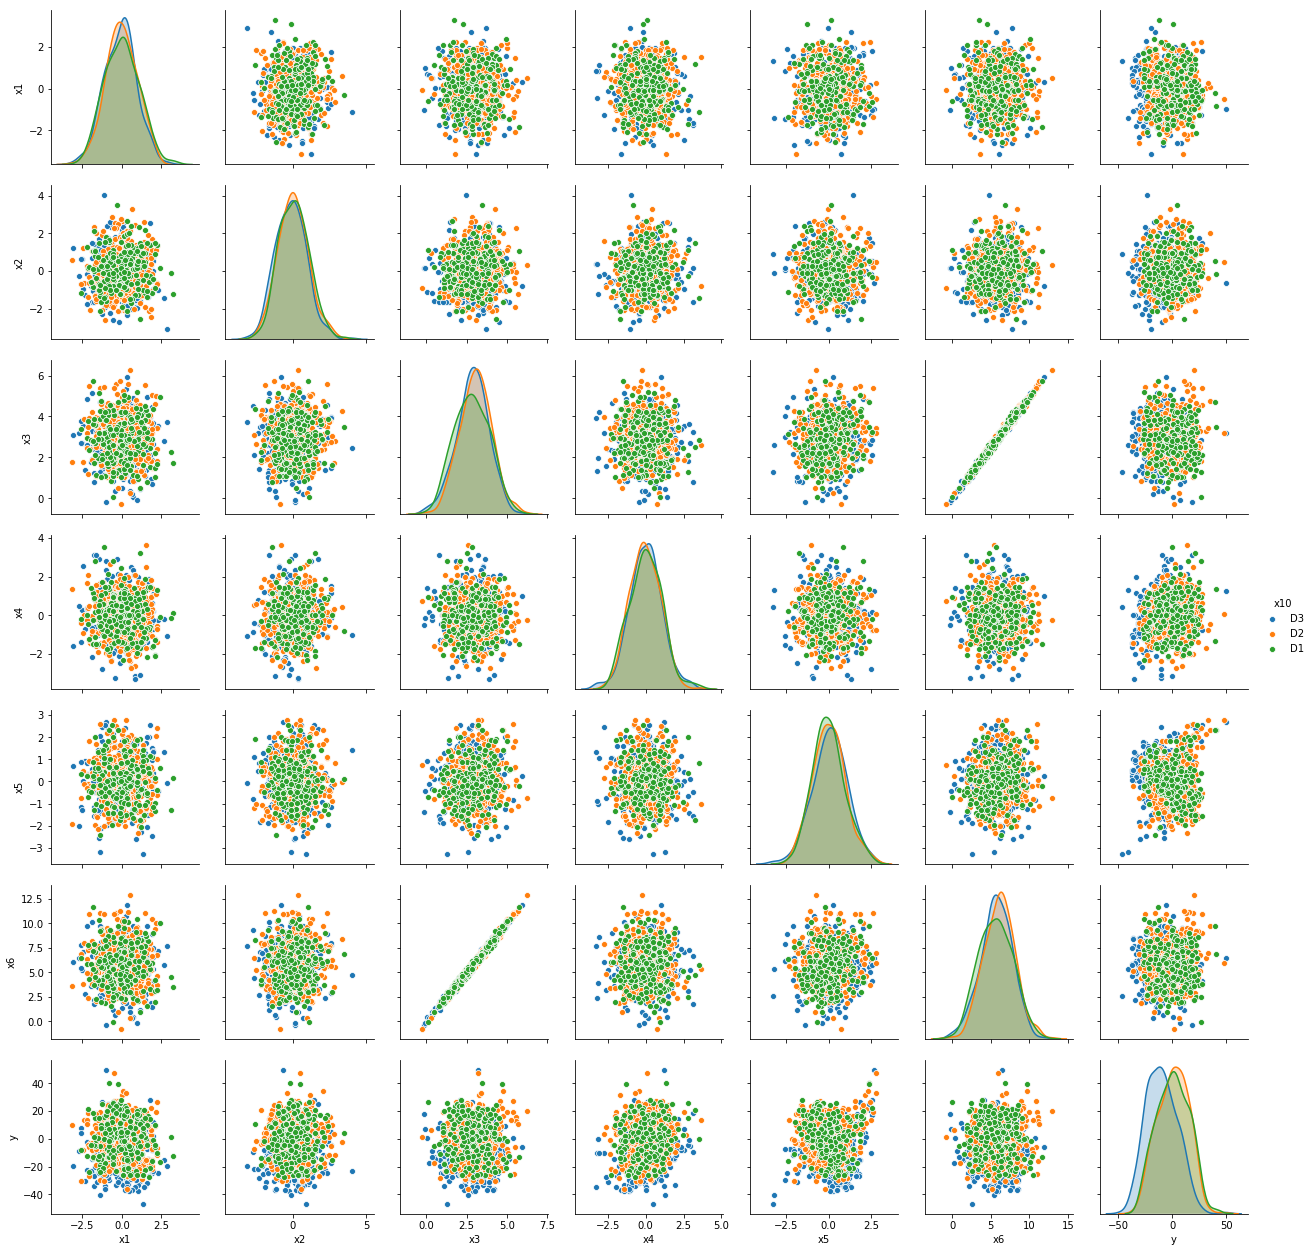

In [113]:
# x10
sb.pairplot(df9, hue='x10')

It's hard to draw any definitive conclusions due to point layer, but the density plots in the bottom right suggest that x7 has difference distribution peaks.  Which is reinforced by the regression effects (A2 has ~-18 net effect relative to A1).

For each numeric variable, let's test interacting x7 with it and see if any produce a particularly better fit.  Though it's possible we're already estimating the effect.

For reference, previous R2 = 0.93

In [114]:
# x1 * x7
smf.ols(
    formula='''y ~ x1*x7 + np.power(x1, 2)*x7 + np.power(x1, 3)*x7 +
                   x2 + np.power(x2, 2) +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x6 + np.power(x6, 2) + np.power(x6, 3) + 
                   x8 + x9 + x10''',
    data=df9
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     180.7
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:16:44   Log-Likelihood:                -2788.9
No. Observations:                1000   AIC:                             5722.
Df Residuals:                     928   BIC:                             6075.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -11.7760      2.301     -5.118      0.000     -16.291      -7.261
x7[T.A2]                   -18.3404      0.332    -55.184      0.000     -18.993     -17.688
x8[T.B2]                     0.4377      0.425      1.031      0.303      -0.396       1.271
x8[T.B3]                    13.4344      1.706      7.875      0.000      10.087      16.782
x8[T.B4]                    10.4048      0.969     10.737      0.000       8.503      12.306
x8[T.B5]                    10.6115      0.956     11.100      0.000       8.735      12.488
x9[T.C1]                     2.0369      1.410      1.444      0.149      -0.731       4.805
x9[T.C10]                   -0.9750      1.321     -0.738      0.461      -3.568       1.618
x9[T.C11]                    2.9753      1.398      2.129      0.034       0.232       5.718
x9[T.C12]                    7.1921      1.421      5.060      0.000       4.402       9.982
x9[T.C13]                   14.9880      1.461     10.259      0.000      12.121      17.855
x9[T.C14]                   17.6150      1.460     12.069      0.000      14.751      20.479
x9[T.C15]                   -0.0601      1.407     -0.043      0.966      -2.822       2.702
x9[T.C16]                    2.8311      1.394      2.030      0.043       0.094       5.568
x9[T.C17]                    9.5121      1.396      6.814      0.000       6.772      12.252
x9[T.C18]                   14.8440      1.613      9.202      0.000      11.678      18.010
x9[T.C19]                   19.2868      1.446     13.342      0.000      16.450      22.124
x9[T.C2]                     7.4112      1.448      5.117      0.000       4.569      10.254
x9[T.C20]                   -1.3448      1.358     -0.990      0.322      -4.010       1.320
x9[T.C21]                    3.7047      1.441      2.572      0.010       0.877       6.532
x9[T.C22]                    9.3641      1.397      6.704      0.000       6.623      12.105
x9[T.C23]                   14.5009      1.376     10.539      0.000      11.801      17.201
x9[T.C24]                   18.8831      1.527     12.363      0.000      15.886      21.881
x9[T.C25]                   -1.8369      1.400     -1.312      0.190      -4.584       0.911
x9[T.C26]                    3.5225      1.485      2.373      0.018       0.609       6.436
x9[T.C27]                    8.4753      1.566      5.411      0.000       5.401      11.549
x9[T.C28]                   14.3247      1.394     10.278      0.000      11.589      17.060
x9[T.C29]                   19.7576      1.439     13.726      0.000      16.933      22.583
x9[T.C3]                    14.7586      1.379     10.699      0.000      12.051      17.466
x9[T.C30]                   -1.9355      1.422     -1.361      0.174      -4.726       0.855
x9[T.C31]     

In [115]:
# x2 * x7
smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   x2*x7 + np.power(x2, 2)*x7 +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x6 + np.power(x6, 2) + np.power(x6, 3) + 
                   x8 + x9 + x10''',
    data=df9
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     254.8
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:16:49   Log-Likelihood:                -2634.1
No. Observations:                1000   AIC:                             5410.
Df Residuals:                     929   BIC:                             5759.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.5518      1.964     -4.355      0.000     -12.406      -4.698
x7[T.A2]                   -21.4574      0.281    -76.469      0.000     -22.008     -20.907
x8[T.B2]                     0.5856      0.364      1.611      0.108      -0.128       1.299
x8[T.B3]                    11.3835      1.456      7.819      0.000       8.526      14.241
x8[T.B4]                    10.0023      0.827     12.089      0.000       8.379      11.626
x8[T.B5]                    10.2122      0.816     12.513      0.000       8.611      11.814
x9[T.C1]                     2.5907      1.207      2.147      0.032       0.223       4.959
x9[T.C10]                   -0.7235      1.131     -0.640      0.522      -2.942       1.495
x9[T.C11]                    2.9038      1.196      2.428      0.015       0.556       5.251
x9[T.C12]                    7.3682      1.217      6.056      0.000       4.981       9.756
x9[T.C13]                   14.4701      1.251     11.566      0.000      12.015      16.925
x9[T.C14]                   17.5873      1.249     14.077      0.000      15.135      20.039
x9[T.C15]                   -0.5830      1.203     -0.485      0.628      -2.944       1.778
x9[T.C16]                    2.8932      1.194      2.424      0.016       0.551       5.236
x9[T.C17]                    9.4465      1.195      7.908      0.000       7.102      11.791
x9[T.C18]                   13.1176      1.384      9.477      0.000      10.401      15.834
x9[T.C19]                   19.2965      1.236     15.617      0.000      16.872      21.721
x9[T.C2]                     7.2254      1.238      5.837      0.000       4.796       9.655
x9[T.C20]                   -1.2081      1.159     -1.043      0.297      -3.482       1.066
x9[T.C21]                    3.8707      1.233      3.140      0.002       1.451       6.290
x9[T.C22]                    8.9818      1.195      7.517      0.000       6.637      11.327
x9[T.C23]                   13.9989      1.177     11.891      0.000      11.688      16.309
x9[T.C24]                   18.2832      1.307     13.989      0.000      15.718      20.848
x9[T.C25]                   -1.8248      1.198     -1.523      0.128      -4.177       0.527
x9[T.C26]                    2.7597      1.271      2.172      0.030       0.266       5.254
x9[T.C27]                    8.7009      1.341      6.486      0.000       6.068      11.334
x9[T.C28]                   13.9595      1.192     11.712      0.000      11.620      16.299
x9[T.C29]                   19.2028      1.231     15.595      0.000      16.786      21.619
x9[T.C3]                    13.9345      1.181     11.797      0.000      11.616      16.253
x9[T.C30]                   -1.5177      1.217     -1.247      0.213      -3.906       0.871
x9[T.C31]     

In [116]:
# x4 * x7
smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   x2 + np.power(x2, 2) +
                   x4*x7 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x6 + np.power(x6, 2) + np.power(x6, 3) + 
                   x8 + x9 + x10''',
    data=df9
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     185.8
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:16:53   Log-Likelihood:                -2790.0
No. Observations:                1000   AIC:                             5720.
Df Residuals:                     930   BIC:                             6064.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -11.7272      2.285     -5.133      0.000     -16.211      -7.244
x7[T.A2]          -18.4583      0.266    -69.291      0.000     -18.981     -17.935
x8[T.B2]            0.4362      0.424      1.028      0.304      -0.397       1.269
x8[T.B3]           13.3942      1.695      7.903      0.000      10.068      16.721
x8[T.B4]           10.3681      0.966     10.730      0.000       8.472      12.264
x8[T.B5]           10.5581      0.954     11.069      0.000       8.686      12.430
x9[T.C1]            2.0765      1.410      1.473      0.141      -0.690       4.843
x9[T.C10]          -0.9364      1.320     -0.709      0.478      -3.527       1.654
x9[T.C11]           3.0124      1.397      2.156      0.031       0.270       5.755
x9[T.C12]           7.1836      1.422      5.052      0.000       4.393       9.974
x9[T.C13]          15.0056      1.462     10.263      0.000      12.136      17.875
x9[T.C14]          17.6404      1.459     12.087      0.000      14.776      20.505
x9[T.C15]          -0.1203      1.405     -0.086      0.932      -2.878       2.637
x9[T.C16]           2.8583      1.394      2.050      0.041       0.122       5.594
x9[T.C17]           9.5053      1.396      6.811      0.000       6.766      12.244
x9[T.C18]          14.8871      1.613      9.230      0.000      11.722      18.053
x9[T.C19]          19.2101      1.443     13.310      0.000      16.378      22.043
x9[T.C2]            7.4520      1.446      5.153      0.000       4.614      10.290
x9[T.C20]          -1.2890      1.353     -0.952      0.341      -3.945       1.367
x9[T.C21]           3.7228      1.440      2.585      0.010       0.897       6.549
x9[T.C22]           9.3884      1.397      6.723      0.000       6.648      12.129
x9[T.C23]          14.6024      1.374     10.627      0.000      11.906      17.299
x9[T.C24]          18.9498      1.528     12.400      0.000      15.951      21.949
x9[T.C25]          -1.8042      1.400     -1.289      0.198      -4.551       0.942
x9[T.C26]           3.5478      1.484      2.391      0.017       0.636       6.460
x9[T.C27]           8.4784      1.567      5.411      0.000       5.403      11.553
x9[T.C28]          14.4109      1.393     10.346      0.000      11.677      17.145
x9[T.C29]          19.8737      1.438     13.819      0.000      17.051      22.696
x9[T.C3]           14.7837      1.379     10.718      0.000      12.077      17.491
x9[T.C30]          -1.9175      1.421     -1.349      0.178      -4.707       0.872
x9[T.C31]           3.8574      1.493      2.584      0.010       0.928       6.787
x9[T.C32]           8.5114      1.443      5.900      0.000       5.680      11.342
x9[T.C33]          12.9938      1.411      9.210      0.000      10.225      15.763
x9[T.C34]          18.6489      1.372     13.591      0.000

In [117]:
# x5 * x7
smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   x2 + np.power(x2, 2) +
                   x4 +
                   x5*x7 + np.power(x5, 2)*x7 + np.power(x5, 3)*x7 +
                   x6 + np.power(x6, 2) + np.power(x6, 3) + 
                   x8 + x9 + x10''',
    data=df9
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     180.9
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:16:58   Log-Likelihood:                -2788.4
No. Observations:                1000   AIC:                             5721.
Df Residuals:                     928   BIC:                             6074.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -11.7717      2.288     -5.145      0.000     -16.262      -7.282
x7[T.A2]                   -18.1579      0.326    -55.741      0.000     -18.797     -17.519
x8[T.B2]                     0.4368      0.424      1.030      0.303      -0.395       1.269
x8[T.B3]                    13.3239      1.695      7.862      0.000       9.998      16.650
x8[T.B4]                    10.3460      0.966     10.714      0.000       8.451      12.241
x8[T.B5]                    10.5257      0.953     11.043      0.000       8.655      12.396
x9[T.C1]                     2.0403      1.410      1.448      0.148      -0.726       4.807
x9[T.C10]                   -0.9634      1.321     -0.729      0.466      -3.556       1.629
x9[T.C11]                    2.9873      1.397      2.139      0.033       0.247       5.728
x9[T.C12]                    7.1761      1.422      5.048      0.000       4.386       9.966
x9[T.C13]                   14.9883      1.461     10.262      0.000      12.122      17.855
x9[T.C14]                   17.6976      1.460     12.118      0.000      14.832      20.564
x9[T.C15]                   -0.0404      1.407     -0.029      0.977      -2.801       2.720
x9[T.C16]                    2.9353      1.394      2.105      0.036       0.199       5.671
x9[T.C17]                    9.5780      1.398      6.849      0.000       6.834      12.322
x9[T.C18]                   15.1105      1.617      9.344      0.000      11.937      18.284
x9[T.C19]                   19.2163      1.443     13.312      0.000      16.383      22.049
x9[T.C2]                     7.4142      1.448      5.122      0.000       4.573      10.255
x9[T.C20]                   -1.3081      1.356     -0.965      0.335      -3.969       1.353
x9[T.C21]                    3.7209      1.440      2.584      0.010       0.895       6.547
x9[T.C22]                    9.4084      1.398      6.730      0.000       6.665      12.152
x9[T.C23]                   14.5416      1.377     10.564      0.000      11.840      17.243
x9[T.C24]                   18.9315      1.526     12.407      0.000      15.937      21.926
x9[T.C25]                   -1.8611      1.401     -1.329      0.184      -4.610       0.888
x9[T.C26]                    3.5387      1.483      2.386      0.017       0.627       6.450
x9[T.C27]                    8.4915      1.566      5.424      0.000       5.419      11.564
x9[T.C28]                   14.3873      1.395     10.316      0.000      11.650      17.124
x9[T.C29]                   19.9350      1.438     13.862      0.000      17.113      22.757
x9[T.C3]                    14.7273      1.379     10.681      0.000      12.021      17.433
x9[T.C30]                   -1.8850      1.421     -1.327      0.185      -4.674       0.904
x9[T.C31]     

In [118]:
# x6 * x7
smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   x2 + np.power(x2, 2) +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x6*x7 + np.power(x6, 2)*x7 + np.power(x6, 3)*x7 + 
                   x8 + x9 + x10''',
    data=df9
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     180.4
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:17:05   Log-Likelihood:                -2789.5
No. Observations:                1000   AIC:                             5723.
Df Residuals:                     928   BIC:                             6076.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -11.3403      2.414     -4.698      0.000     -16.077      -6.603
x7[T.A2]                   -20.2130      2.479     -8.155      0.000     -25.077     -15.349
x8[T.B2]                     0.3993      0.425      0.939      0.348      -0.436       1.234
x8[T.B3]                    13.4397      1.698      7.917      0.000      10.108      16.771
x8[T.B4]                    10.4106      0.967     10.765      0.000       8.513      12.308
x8[T.B5]                    10.5941      0.954     11.104      0.000       8.722      12.466
x9[T.C1]                     2.0697      1.414      1.464      0.144      -0.705       4.845
x9[T.C10]                   -0.9844      1.324     -0.743      0.457      -3.583       1.615
x9[T.C11]                    2.9737      1.401      2.123      0.034       0.224       5.723
x9[T.C12]                    7.1712      1.424      5.037      0.000       4.377       9.965
x9[T.C13]                   14.9904      1.462     10.252      0.000      12.121      17.860
x9[T.C14]                   17.5565      1.463     11.997      0.000      14.684      20.428
x9[T.C15]                   -0.1328      1.409     -0.094      0.925      -2.897       2.632
x9[T.C16]                    2.8185      1.397      2.017      0.044       0.077       5.560
x9[T.C17]                    9.4637      1.398      6.769      0.000       6.720      12.207
x9[T.C18]                   14.8159      1.618      9.156      0.000      11.640      17.992
x9[T.C19]                   19.1650      1.448     13.236      0.000      16.323      22.007
x9[T.C2]                     7.3510      1.453      5.061      0.000       4.500      10.202
x9[T.C20]                   -1.2914      1.355     -0.953      0.341      -3.951       1.368
x9[T.C21]                    3.6144      1.445      2.501      0.013       0.778       6.451
x9[T.C22]                    9.3745      1.401      6.691      0.000       6.625      12.124
x9[T.C23]                   14.5405      1.378     10.549      0.000      11.835      17.246
x9[T.C24]                   18.9494      1.531     12.376      0.000      15.944      21.954
x9[T.C25]                   -1.8330      1.407     -1.303      0.193      -4.593       0.927
x9[T.C26]                    3.5289      1.487      2.373      0.018       0.611       6.447
x9[T.C27]                    8.4425      1.572      5.372      0.000       5.358      11.527
x9[T.C28]                   14.4096      1.399     10.299      0.000      11.664      17.155
x9[T.C29]                   19.8112      1.442     13.742      0.000      16.982      22.640
x9[T.C3]                    14.7932      1.385     10.679      0.000      12.075      17.512
x9[T.C30]                   -1.9900      1.429     -1.393      0.164      -4.794       0.814
x9[T.C31]     

x2 is the only one with significant interaction effects and seems to improved overall fit (R2 0.93 -> 0.95).  But only the squared terms were significant, and in opposite directions.  Let's visualize this to see if it makes sense.

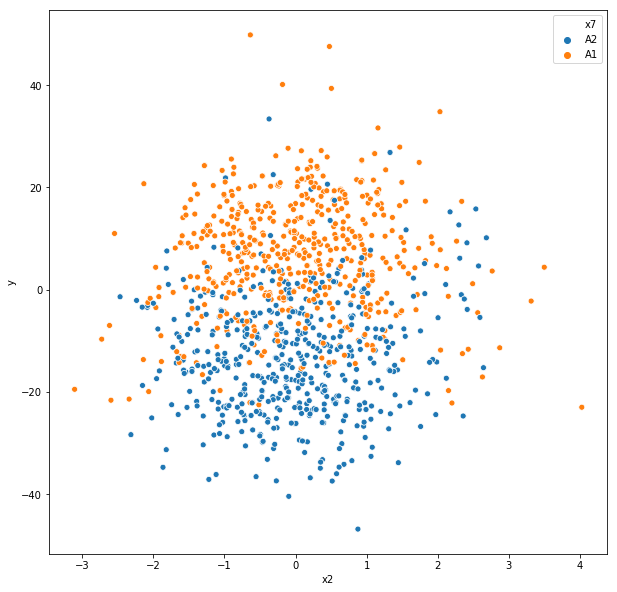

In [119]:
# Plot as is
plt.figure(figsize=(10, 10))
sb.scatterplot(data=df9, x='x2', y='y', hue='x7')

In [120]:
# Plot fit of a regression with just x2 and x7 for A1 and A2 separately
tmp_model = smf.ols(
    formula='''y ~ x2*x7 + np.power(x2, 2)*x7''',
    data=df9
).fit()

tmp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     176.0
Date:                Sun, 07 Jun 2020   Prob (F-statistic):          3.80e-134
Time:                        22:22:21   Log-Likelihood:                -3819.9
No. Observations:                1000   AIC:                             7652.
Df Residuals:                     994   BIC:                             7681.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    8.8902      0.588     15.120      0.000       7.736      10.044
x7[T.A2]                   -23.6133      0.857    -27.569      0.000     -25.294     -21.933
x2                           0.9947      0.473      2.101      0.036       0.066       1.924
x2:x7[T.A2]                 -0.2108      0.691     -0.305      0.761      -1.568       1.146
np.power(x2, 2)             -1.9853      0.293     -6.774      0.000      -2.560      -1.410
np.power(x2, 2):x7[T.A2]     3.4954      0.475      7.362      0.000       2.564       4.427
==============================================================================
Omnibus:                       18.526   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.374
Skew:                           0.245   Prob(JB):                     1.39e-05
Kurtosis:                       3.545   Cond. No.                         6.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Similar effects to the overall regression, so reasonably estimating the effect.

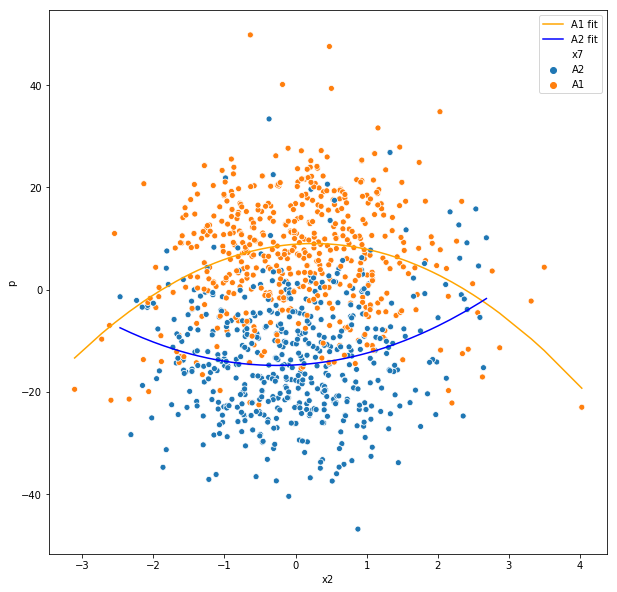

In [123]:
# Plot with fit lines
tmp_df = df9.assign(p = tmp_model.predict(df9))

plt.figure(figsize=(10, 10))
sb.scatterplot(data=tmp_df, x='x2', y='y', hue='x7')
sb.lineplot(data=tmp_df[tmp_df.x7 == 'A1'].sort_values('x2'), x='x2', y='p', color='orange', label='A1 fit')
sb.lineplot(data=tmp_df[tmp_df.x7 == 'A2'].sort_values('x2'), x='x2', y='p', color='blue', label='A2 fit')

In [124]:
# Delete these tmp objects
del tmp_model, tmp_df

It seems to be picking up on something, so let's leave it in.

Refit and summarize.

In [126]:
# x2 * x7
smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   x2*x7 + np.power(x2, 2)*x7 +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x6 + np.power(x6, 2) + np.power(x6, 3) + 
                   x8 + x9 + x10''',
    data=df9
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     254.8
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:23:42   Log-Likelihood:                -2634.1
No. Observations:                1000   AIC:                             5410.
Df Residuals:                     929   BIC:                             5759.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.5518      1.964     -4.355      0.000     -12.406      -4.698
x7[T.A2]                   -21.4574      0.281    -76.469      0.000     -22.008     -20.907
x8[T.B2]                     0.5856      0.364      1.611      0.108      -0.128       1.299
x8[T.B3]                    11.3835      1.456      7.819      0.000       8.526      14.241
x8[T.B4]                    10.0023      0.827     12.089      0.000       8.379      11.626
x8[T.B5]                    10.2122      0.816     12.513      0.000       8.611      11.814
x9[T.C1]                     2.5907      1.207      2.147      0.032       0.223       4.959
x9[T.C10]                   -0.7235      1.131     -0.640      0.522      -2.942       1.495
x9[T.C11]                    2.9038      1.196      2.428      0.015       0.556       5.251
x9[T.C12]                    7.3682      1.217      6.056      0.000       4.981       9.756
x9[T.C13]                   14.4701      1.251     11.566      0.000      12.015      16.925
x9[T.C14]                   17.5873      1.249     14.077      0.000      15.135      20.039
x9[T.C15]                   -0.5830      1.203     -0.485      0.628      -2.944       1.778
x9[T.C16]                    2.8932      1.194      2.424      0.016       0.551       5.236
x9[T.C17]                    9.4465      1.195      7.908      0.000       7.102      11.791
x9[T.C18]                   13.1176      1.384      9.477      0.000      10.401      15.834
x9[T.C19]                   19.2965      1.236     15.617      0.000      16.872      21.721
x9[T.C2]                     7.2254      1.238      5.837      0.000       4.796       9.655
x9[T.C20]                   -1.2081      1.159     -1.043      0.297      -3.482       1.066
x9[T.C21]                    3.8707      1.233      3.140      0.002       1.451       6.290
x9[T.C22]                    8.9818      1.195      7.517      0.000       6.637      11.327
x9[T.C23]                   13.9989      1.177     11.891      0.000      11.688      16.309
x9[T.C24]                   18.2832      1.307     13.989      0.000      15.718      20.848
x9[T.C25]                   -1.8248      1.198     -1.523      0.128      -4.177       0.527
x9[T.C26]                    2.7597      1.271      2.172      0.030       0.266       5.254
x9[T.C27]                    8.7009      1.341      6.486      0.000       6.068      11.334
x9[T.C28]                   13.9595      1.192     11.712      0.000      11.620      16.299
x9[T.C29]                   19.2028      1.231     15.595      0.000      16.786      21.619
x9[T.C3]                    13.9345      1.181     11.797      0.000      11.616      16.253
x9[T.C30]                   -1.5177      1.217     -1.247      0.213      -3.906       0.871
x9[T.C31]     

To simplify the model, let's drop the following because they haven't been showing up as significant at all:

- x2 linear terms
- x6 all terms

In [127]:
# x2 * x7
model9_nonlinear_x2x7 = smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   np.power(x2, 2)*x7 +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x8 + x9 + x10''',
    data=df9
).fit()

In [128]:
# Summarize
model9_nonlinear_x2x7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     274.5
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:23:44   Log-Likelihood:                -2636.6
No. Observations:                1000   AIC:                             5405.
Df Residuals:                     934   BIC:                             5729.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -9.5378      1.744     -5.469      0.000     -12.961      -6.115
x7[T.A2]                   -21.4570      0.279    -76.780      0.000     -22.005     -20.909
x8[T.B2]                     0.6044      0.362      1.670      0.095      -0.106       1.315
x8[T.B3]                    11.3440      1.446      7.846      0.000       8.506      14.182
x8[T.B4]                     9.9614      0.826     12.059      0.000       8.340      11.583
x8[T.B5]                    10.1858      0.815     12.497      0.000       8.586      11.785
x9[T.C1]                     2.5037      1.199      2.088      0.037       0.150       4.857
x9[T.C10]                   -0.8099      1.125     -0.720      0.472      -3.018       1.398
x9[T.C11]                    2.7994      1.191      2.350      0.019       0.462       5.137
x9[T.C12]                    7.2970      1.215      6.007      0.000       4.913       9.681
x9[T.C13]                   14.4729      1.249     11.588      0.000      12.022      16.924
x9[T.C14]                   17.5175      1.247     14.043      0.000      15.070      19.966
x9[T.C15]                   -0.6144      1.201     -0.512      0.609      -2.971       1.742
x9[T.C16]                    2.8958      1.191      2.431      0.015       0.558       5.234
x9[T.C17]                    9.3616      1.192      7.857      0.000       7.023      11.700
x9[T.C18]                   13.0754      1.382      9.463      0.000      10.364      15.787
x9[T.C19]                   19.2241      1.231     15.611      0.000      16.807      21.641
x9[T.C2]                     7.1646      1.235      5.802      0.000       4.741       9.588
x9[T.C20]                   -1.2413      1.155     -1.075      0.283      -3.508       1.026
x9[T.C21]                    3.7633      1.228      3.065      0.002       1.353       6.173
x9[T.C22]                    8.9478      1.190      7.517      0.000       6.612      11.284
x9[T.C23]                   13.8963      1.172     11.860      0.000      11.597      16.196
x9[T.C24]                   18.2075      1.302     13.984      0.000      15.652      20.763
x9[T.C25]                   -1.8311      1.194     -1.533      0.126      -4.175       0.512
x9[T.C26]                    2.6060      1.267      2.057      0.040       0.120       5.092
x9[T.C27]                    8.6636      1.337      6.480      0.000       6.040      11.287
x9[T.C28]                   13.9661      1.189     11.747      0.000      11.633      16.299
x9[T.C29]                   19.1665      1.229     15.595      0.000      16.755      21.578
x9[T.C3]                    13.8398      1.178     11.752      0.000      11.529      16.151
x9[T.C30]                   -1.5511      1.215     -1.276      0.202      -3.936       0.834
x9[T.C31]     

Those multi-collinearity messages dropped away too!

### Now, let's take a deeper look at x9

     x9   n     y_mean       y_sd     p_mean       p_sd
0    C0  15 -14.964970  10.589358 -14.964970   9.455718
1    C1  20 -13.259830  11.731550 -13.259830  11.964432
2   C10  28 -10.318145  13.439793 -10.318145  12.666114
3   C11  21  -4.835676  13.653536  -4.835676  13.117272
4   C12  19  -1.179628  14.839631  -1.179628  13.517803
5   C13  17   3.900295  12.651150   3.900295  12.443917
6   C14  17   5.196334  10.934525   5.196334  10.585961
7   C15  20  -9.186914  12.671340  -9.186914  12.474325
8   C16  21  -8.366996  12.107585  -8.366996  12.241458
9   C17  21  -3.341562  16.038038  -3.341562  16.489239
10  C18  12   3.346333  14.467222   3.346333  14.755410
11  C19  18  11.671869  11.388049  11.671869  12.194840
12   C2  18  -4.783132  12.484306  -4.783132  11.359167
13  C20  24 -15.938042  14.072403 -15.938042  13.275516
14  C21  18 -11.672869  11.694724 -11.672869  11.470935
15  C22  21  -2.830809  12.411048  -2.830809  13.166352
16  C23  23   7.584358  13.240892   7.584358  12

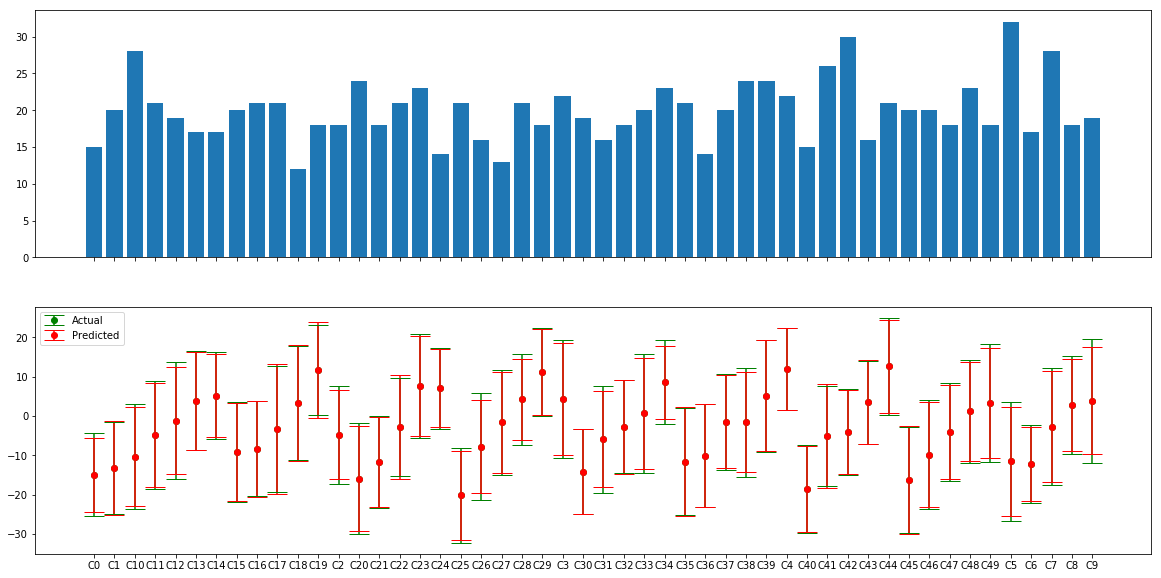

In [133]:
# x9
plot_univariate(df9, 'x9', 'y', model9_nonlinear_x2x7)

In [137]:
# Value counts for x9
df9['x9'].value_counts().value_counts().sort_index()

12    1
13    1
14    2
15    2
16    3
17    3
18    8
19    3
20    6
21    8
22    2
23    3
24    3
26    1
28    2
30    1
32    1
Name: x9, dtype: int64

x9 presents a few interesting problems:

- A lot of unique values relative to the total size of the data, 50:1000 or 1:20 unique value
- Most have relative few occurrances, which might make it hard to generalize

However, the boxplot above suggests that there are differences in distributions.  Glossing over the whole train/test/holdout procedure we should use (which presents even more potential problems, e.g. what if there is a new value that shows up at scoring time?!), here a few ways we could deal with it:

- Include as is
    - Pros: No work up front
    - Cons: Ignores all the problems above, might be very hard to interpret or generalize
- Leave most common groups "as is" and group together all low count groups
    - Pros: Does some work to help generalize the model and trust that we can interpret effects
    - Cons: Might be grouping together very different values
- Encode the factor as a number that represents its a relationship with our target (e.g simple average by group, weight of information, leave one out)
    - Pros: Creates a reasonably interpretable variable for modelling
    - Cons: Can simplify fixed effects and be hard to trust that it extends to other values

Note that all three of these are hard to do well without train/test/holdout, otherwise we will almost certainly overfit out model on the training data.

But for funsies since we've already tried the first, let's try the second and the third.

##### Keeping the top n values distinct

Iterate over each amount of sample size (e.g. keep only the 1 value with 32 separate and group the others, then keep both value with 32 and 30 separate and group the others, and so on until we're left with everything as it's own group) Pull out R2 

In [50]:
# It



smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   np.power(x2, 2)*x7 +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x8 + x9 + x10''',
    data=df9
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     78.14
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:22:01   Log-Likelihood:                -2547.9
No. Observations:                1000   AIC:                             5526.
Df Residuals:                     785   BIC:                             6581.
Df Model:                         214                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -4.6428      2.996     -1.550      0.122     -10.524       1.239
x7[T.A2]                   -21.4909      0.304    -70.698      0.000     -22.088     -20.894
x8[T.B2]                     0.4499      0.403      1.117      0.264      -0.341       1.241
x8[T.B3]                    10.8432      1.621      6.688      0.000       7.660      14.026
x8[T.B4]                     9.6924      0.900     10.769      0.000       7.926      11.459
x8[T.B5]                     9.9405      0.889     11.181      0.000       8.195      11.686
x9[T.C1]                     0.2010      2.871      0.070      0.944      -5.434       5.836
x9[T.C10]                   -7.6323      2.944     -2.593      0.010     -13.411      -1.854
x9[T.C100]                  -5.5084      2.822     -1.952      0.051     -11.048       0.031
x9[T.C101]                  -2.8780      3.043     -0.946      0.345      -8.851       3.095
x9[T.C102]                   3.2802      2.935      1.118      0.264      -2.481       9.042
x9[T.C103]                   9.8083      2.967      3.305      0.001       3.984      15.633
x9[T.C104]                  16.8253      3.040      5.534      0.000      10.857      22.793
x9[T.C105]                  -8.3623      3.203     -2.611      0.009     -14.649      -2.075
x9[T.C106]                  -8.3672      3.510     -2.384      0.017     -15.257      -1.478
x9[T.C107]                   3.8558      2.821      1.367      0.172      -1.681       9.393
x9[T.C108]                  10.8200      4.306      2.513      0.012       2.367      19.273
x9[T.C109]                  13.2077      3.213      4.111      0.000       6.901      19.515
x9[T.C11]                   -1.8325      2.827     -0.648      0.517      -7.381       3.716
x9[T.C110]                  -7.1952      3.525     -2.041      0.042     -14.114      -0.276
x9[T.C111]                   0.0311      2.818      0.011      0.991      -5.501       5.564
x9[T.C112]                   5.7950      2.813      2.060      0.040       0.273      11.317
x9[T.C113]                   8.8727      3.216      2.759      0.006       2.561      15.185
x9[T.C114]                  14.0087      2.871      4.879      0.000       8.372      19.645
x9[T.C115]                  -5.6023      2.977     -1.882      0.060     -11.446       0.242
x9[T.C116]                   3.3095      3.512      0.942      0.346      -3.584      10.203
x9[T.C117]                   3.1295      3.043      1.028      0.304      -2.844       9.103
x9[T.C118]                  10.1089      2.746      3.681      0.000       4.719      15.499
x9[T.C119]                  14.1121      3.200      4.410      0.000       7.830      20.394
x9[T.C12]                    3.6584      2.887      1.267      0.206      -2.010       9.327
x9[T.C120]    

%md
That very high R2 value suggests that we are massively overfitting.  tl;dr I'm not convinced having 12 or fewer observations (and most often 4-5) of a category is enough to expect the data to generalize to other data (which is usually the whole reason we're building a model).

For funsies, let's try doing a very basic 70/30 train/test and see how it goes.

In [ ]:
# Train/test split
x9_train, x9_test = train_test_split(df9, train_size=0.70, test_size=0.30, random_state=666)

# Fit train
x9_model = smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   np.power(x2, 2)*x7 +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x8 + x9 + x10''',
    data=x9_train
).fit()

# Predict test
x9_test['p_x9_model'] = x9_model.predict(x9_test)

In [ ]:
# Aha, I bet C162 doesn't exist in the training data.  Let's confirm.
x9_train[x9_train.x9 == "C162"]

Yep, no rows.  Which is another risk we run into with low exposure categories.  There are ways to deal with this, but we'll stop because Derek made this variable a bit ridiculous to deal with in this size of a data set.

More generally, I'd recommend taking a look through some of these pages/repos for background and ideas and some code:

- Decent survey of some common (and some new ones for Derek) techniques: https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
- Leave one out (LOO) https://github.com/welfare520/leave-one-out-encoder/tree/master/loo_encoder